In [238]:
#@title imports 
import os
import pickle
from typing import Set
# from jedi import settings
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [180]:
import sys 
sys.path.append('C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts')

from UMAP import *
# from heatmap import heatmap, corrplot

In [181]:

data_acsf_all_conds = pickle.load(open('/content/gdrive/MyDrive/Cluster Feature files/all_acsf_ephys.p','rb'))
data_acsf_all_conds_new = pickle.load(open('/content/gdrive/MyDrive/Cluster Feature files/all_acsf_ephys_all_conds.p','rb'))

ind_feat = [0,3,4,6,9,17,20]

features = ['Vm_avg','dvdt_p','dvdt_n','resistance','thr','adaptation',
    'isi','peak','peak_adaptation','ap_width','hyp_value','fist_spike','up_down_ratio',
    'isi_adaptation','thr_adp_ind','psth','int_fr','fr','sub_thr','spk_fr_adp','imp']

print(np.array(features)[[0,3,4,6,18,20]])
data_acsf_exc_all_conds  = np.squeeze(data_acsf_all_conds['exc_acsf']) 
data_acsf_inh_all_conds  = np.squeeze(data_acsf_all_conds['inh_acsf'])

# data_acsf_exc_all_conds  = np.squeeze(data_acsf_all_conds_new['exc_acsf'])
# data_acsf_inh_all_conds  = np.squeeze(data_acsf_all_conds_new['inh_acsf'])

df_all_conds_exc = pd.DataFrame(data_acsf_exc_all_conds,columns=features)
df_all_conds_exc['exp_name'] = data_acsf_all_conds_new['exp_exc']
df_all_conds_exc = df_all_conds_exc.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df_all_conds_inh = pd.DataFrame(data_acsf_inh_all_conds,columns=features)
df_all_conds_inh['exp_name'] = data_acsf_all_conds_new['exp_inh']
df_all_conds_inh = df_all_conds_inh.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

df_all_conds = pd.DataFrame(np.concatenate((np.squeeze(data_acsf_exc_all_conds),np.squeeze(data_acsf_inh_all_conds))),columns=features)
df_all_conds['ei labels'] = np.concatenate((np.repeat('exc',len(data_acsf_exc_all_conds)),np.repeat('inh',len(data_acsf_inh_all_conds))))

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Cluster Feature files/all_acsf_ephys.p'

In [268]:
# features_ext = ['Vm_avg', 'dvdt_p', 'dvdt_n', 'avg_V', 'resistance', 'thr',
#                 'adaptation','isi','peak','peak_adaptation','ap_width', 'hyp_value',
#                 'fist_spike','up_down_ratio', 'isi_adaptation', 'thr_adp_ind', 'psth',
#                 'int_fr','fr', 'sub_thr','mi','spk_fr_adp','imp','cond','exp_name']

features_ext = ['Vm_avg', 'dvdt_p','dvdt_n','avg_V','resistance','thr','adaptation','isi','peak',
                'peak_adaptation','ap_width', 'hyp_value','fist_spike','up_down_ratio','isi_adaptation',
                'thr_adp_ind','psth','int_fr','fr', 'sub_thr','mi','spk_fr_adp','imp','exp_name','cond' ]               
data_all_conds = pickle.load(open('G:/My Drive/Cluster Feature files/all_acsf_ephys_with_MI_new.p','rb'))
exc = data_all_conds['exc']
inh = data_all_conds['inh']
exc_df = pd.DataFrame(exc,columns = features_ext)
exc_df = pd.concat((exc_df.groupby('cond').get_group('aCSF'),
                    exc_df.groupby('cond').get_group('ACSF')))
exc_df = exc_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
inh_df = pd.DataFrame(inh,columns = features_ext)
inh_df = inh_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
inh_df = pd.concat((inh_df.groupby('cond').get_group('aCSF'),
                    inh_df.groupby('cond').get_group('ACSF')))


In [265]:
exc_df

        Vm_avg    dvdt_p    dvdt_n      avg_V  resistance        thr  \
0    19.064052  8.621746 -1.798740 -71.094475        -inf -32.737113   
1    19.422547  7.887402 -1.842780 -71.394475   -1.689717 -31.621822   
2    19.575796  8.803019 -2.064160 -73.677506   -2.727707 -32.975678   
3    18.509330  6.789877 -2.181357 -71.615402   -0.918866 -26.923222   
4    26.219333  6.395475 -1.608403 -74.167850    1.995472 -31.495817   
..         ...       ...       ...        ...         ...        ...   
575  27.980800  7.814628 -1.840273 -73.299543   -0.220584 -31.565175   
576  28.239537  7.948305 -1.898901 -71.765677    1.691731 -30.524900   
577  32.709252  4.992496 -1.087460 -69.491095        -inf -28.723908   
578  32.757966  5.031419 -1.150461 -69.408782   -0.887751 -27.271446   
579  32.348755  4.911719 -1.054978 -67.764625    0.873919 -26.053669   

     adaptation            isi       peak  peak_adaptation  ...  thr_adp_ind  \
0      0.035560   24481.289655  54.928479        -0.009

In [240]:
def plot_UMAP_clusters(data_inh,data_exc,neighbours,distance,condition_inh,condition_exc,k_exc,k_inh,random_state):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_exc_umap_scaler = StandardScaler()
    data_exc_umap = data_exc_umap_scaler.fit_transform(data_exc)
    data_exc_umap = normalize(data_exc_umap)
    data_inh_umap = data_exc_umap_scaler.fit_transform(data_inh)
    data_inh_umap = normalize(data_inh_umap)
    # min_size = min(data_exc_umap.shape[0],data_inh_umap.shape[0])
    # kmeans_labels_inh = cluster.KMeans(n_clusters=5).fit_predict(data_inh_umap[:min_size,])
    # kmeans_labels_exc = cluster.KMeans(n_clusters=5).fit_predict(data_exc_umap[:min_size,])
    fig = plt.figure(figsize=[10,4])
    # ax1 = fig.add_subplot(1,2,1,projection='3d')
    ax12d = fig.add_subplot(1,2,1)
    neighbours = neighbours
    dist = distance
    # clusterable_embedding3d = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
    #     n_components=3,random_state=42,).fit_transform(data_exc_umap)
    clusterable_embedding2d_exc = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_exc_umap)

    kmeans_exc = KMeans(n_clusters=k_exc,random_state=random_state).fit(clusterable_embedding2d_exc)
    centroids_exc = kmeans_exc.cluster_centers_
    labels_exc = kmeans_exc.labels_.astype(float)

    df_2d_exc = {'Dim1':clusterable_embedding2d_exc[:, 0],
             'Dim2':clusterable_embedding2d_exc[:, 1],
             'condition':condition_exc,
             'labels':labels_exc}


    sns.scatterplot(data=df_2d_exc,x='Dim1',y='Dim2',hue='labels',  cmap='gist_rainbow',ax=ax12d)
    ax12d.set_title('UMAP clusters for excitatory neurons 2D')
    plt.show()

    fig = plt.figure(figsize=[10,4])
    # ax2 = fig.add_subplot(1,2,1,projection='3d')
    ax22d = fig.add_subplot(1,2,2)
    
    clusterable_embedding3d_inh = umap.UMAP(n_neighbors=neighbours, min_dist=dist,
                                        n_components=3,random_state=random_state).fit_transform(data_inh_umap)

    clusterable_embedding2d_inh = umap.UMAP(n_neighbors=neighbours, min_dist=dist,
                                        n_components=2,random_state=random_state).fit_transform(data_inh_umap)

    kmeans_inh = KMeans(n_clusters=k_inh,random_state=random_state).fit(clusterable_embedding2d_inh)
    centroids_inh = kmeans_inh.cluster_centers_
    labels_inh = kmeans_inh.labels_.astype(float)

    df_2d_inh = {'Dim1':clusterable_embedding2d_inh[:, 0],
                'Dim2':clusterable_embedding2d_inh[:, 1],
                'condition':condition_inh,
                'labels':labels_inh}


    # sns.scatterplot(data=df_3d,x='Dim1',y='Dim2',hue='condition',  cmap='gist_rainbow',ax=ax22d)

    # ax2.scatter(clusterable_embedding3d[:, 0], clusterable_embedding3d[:, 1], clusterable_embedding3d[:, 2],c=c_inh,  cmap='gist_rainbow')
    # ax2.set_title('UMAP clusters for inhibitory neurons 3D')
    sns.scatterplot(data=df_2d_inh,x='Dim1',y='Dim2',hue='labels',  cmap='gist_rainbow',ax=ax22d)
    ax22d.set_title('UMAP clusters for inhibitory neurons 2D')



    plt.show()
    return labels_exc, labels_inh

def plot_UMAP(data_inh,data_exc,c_exc,c_inh,neighbours,distance,condition_inh,condition_exc,figsize=None,random_state=0):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_exc_umap_scaler = StandardScaler()
    data_exc_umap = data_exc_umap_scaler.fit_transform(data_exc)
    data_exc_umap = normalize(data_exc_umap)
    data_inh_umap = data_exc_umap_scaler.fit_transform(data_inh)
    data_inh_umap = normalize(data_inh_umap)
    # min_size = min(data_exc_umap.shape[0],data_inh_umap.shape[0])
    # kmeans_labels_inh = cluster.KMeans(n_clusters=5).fit_predict(data_inh_umap[:min_size,])
    # kmeans_labels_exc = cluster.KMeans(n_clusters=5).fit_predict(data_exc_umap[:min_size,])
    fig = plt.figure(figsize=figsize)
    # ax1 = fig.add_subplot(1,2,1,projection='3d')
    ax12d = fig.add_subplot(1,2,1)
    neighbours = neighbours
    dist = distance
    # clusterable_embedding3d = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
    #     n_components=3,random_state=42,).fit_transform(data_exc_umap)
    clusterable_embedding2d = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_exc_umap)
    df_2d = {'Dim1':clusterable_embedding2d[:, 0],
             'Dim2':clusterable_embedding2d[:, 1],
             'condition':condition_exc}
    sns.scatterplot(data=df_2d,x='Dim1',y='Dim2',hue='condition',  cmap='gist_rainbow',ax=ax12d)
    ax12d.set_title('UMAP excitatory')
    # plt.show()

    # fig = plt.figure(figsize=figsize)
    # ax2 = fig.add_subplot(1,2,1,projection='3d')
    ax22d = fig.add_subplot(1,2,2)
    
    # clusterable_embedding3d = umap.UMAP(n_neighbors=neighbours, min_dist=dist,
    #                                     n_components=3,random_state=42).fit_transform(data_inh_umap)

    clusterable_embedding2d = umap.UMAP(n_neighbors=neighbours, min_dist=dist,
                                        n_components=2,random_state=random_state).fit_transform(data_inh_umap)
    df_2d = {'Dim1':clusterable_embedding2d[:, 0],
             'Dim2':clusterable_embedding2d[:, 1],
             'condition':condition_inh}


    # sns.scatterplot(data=df_3d,x='Dim1',y='Dim2',hue='condition',  cmap='gist_rainbow',ax=ax22d)

    # ax2.scatter(clusterable_embedding3d[:, 0], clusterable_embedding3d[:, 1], clusterable_embedding3d[:, 2],c=c_inh,  cmap='gist_rainbow')
    # ax2.set_title('UMAP clusters for inhibitory neurons 3D')
    sns.scatterplot(data=df_2d,x='Dim1',y='Dim2',hue='condition',  cmap='gist_rainbow',ax=ax22d)
    ax22d.set_title('UMAP inhibitory')


    plt.show()

def plot_UMAP_combined(data_exc,data_inh,neighbours,distance,random_state,figsize):

    data_scaler = StandardScaler()
    data_all = np.concatenate((data_exc,data_inh))
    data_all = data_scaler.fit_transform(data_all)
    data_all = normalize(data_all)
    fig = plt.figure(figsize=figsize)
    # ax1 = fig.add_subplot(1,2,1,projection='3d')
    ax12d = fig.add_subplot(1,1,1)
    neighbours = neighbours
    dist = distance
    labels = np.concatenate((np.repeat('exc',len(data_exc)),np.repeat('inh',len(data_inh))))
    clusterable_embedding2d = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_all)
    df_2d = pd.DataFrame({'Dim1':clusterable_embedding2d[:, 0],
             'Dim2':clusterable_embedding2d[:, 1],
             'type':labels})
    sns.scatterplot(data=df_2d,x='Dim1',y='Dim2', hue='type', cmap='gist_rainbow',ax=ax12d,alpha=.5,markers=['x','.'])
    ax12d.set_title('UMAP excitatory and Inhibitory')
  
    plt.show()  

def plot_UMAP_all_conds(data,labels,neighbours,distance,random_state,figsize):

    data_scaler = StandardScaler()
    data = data_scaler.fit_transform(data)
    data = normalize(data)
    fig = plt.figure(figsize=figsize)
    ax12d = fig.add_subplot(1,1,1)
    neighbours = neighbours
    dist = distance
    labels = labels
    clusterable_embedding2d = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data)
    df_2d = pd.DataFrame({'Dim1':clusterable_embedding2d[:, 0],
             'Dim2':clusterable_embedding2d[:, 1],
             'type':labels})
    sns.scatterplot(data=df_2d,x='Dim1',y='Dim2', hue='type', cmap='gist_rainbow',ax=ax12d,alpha=.5,markers=['x','.'])
    ax12d.set_title('UMAP all conditions')
  
    plt.show()        

5


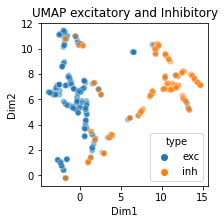

10


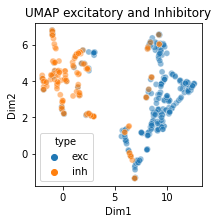

15


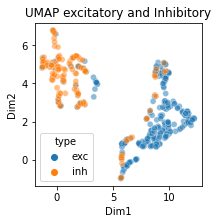

20


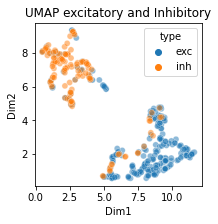

25


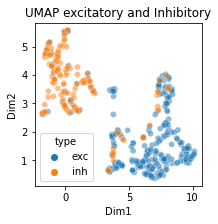

30


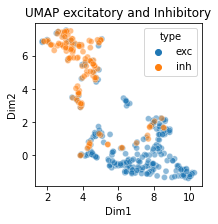

35


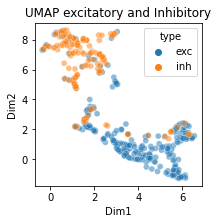

40


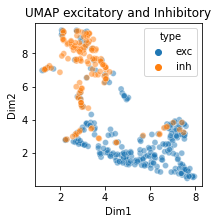

45


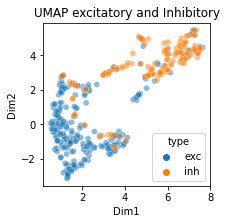

In [241]:
df_exc = exc_df#df_all_conds_exc 
df_inh = inh_df#df_all_conds_inh 

df_exc['labels'] = np.repeat('exc',len(df_exc))
df_inh['labels'] = np.repeat('inh',len(df_inh))
df_comb = pd.concat((df_exc,df_inh))

for i in range(5,50,5):
    print(i)
    plot_UMAP_combined(df_exc[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr', 'imp']],
                       df_inh[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr', 'imp']],
                       i,0.0,1,[3,3])

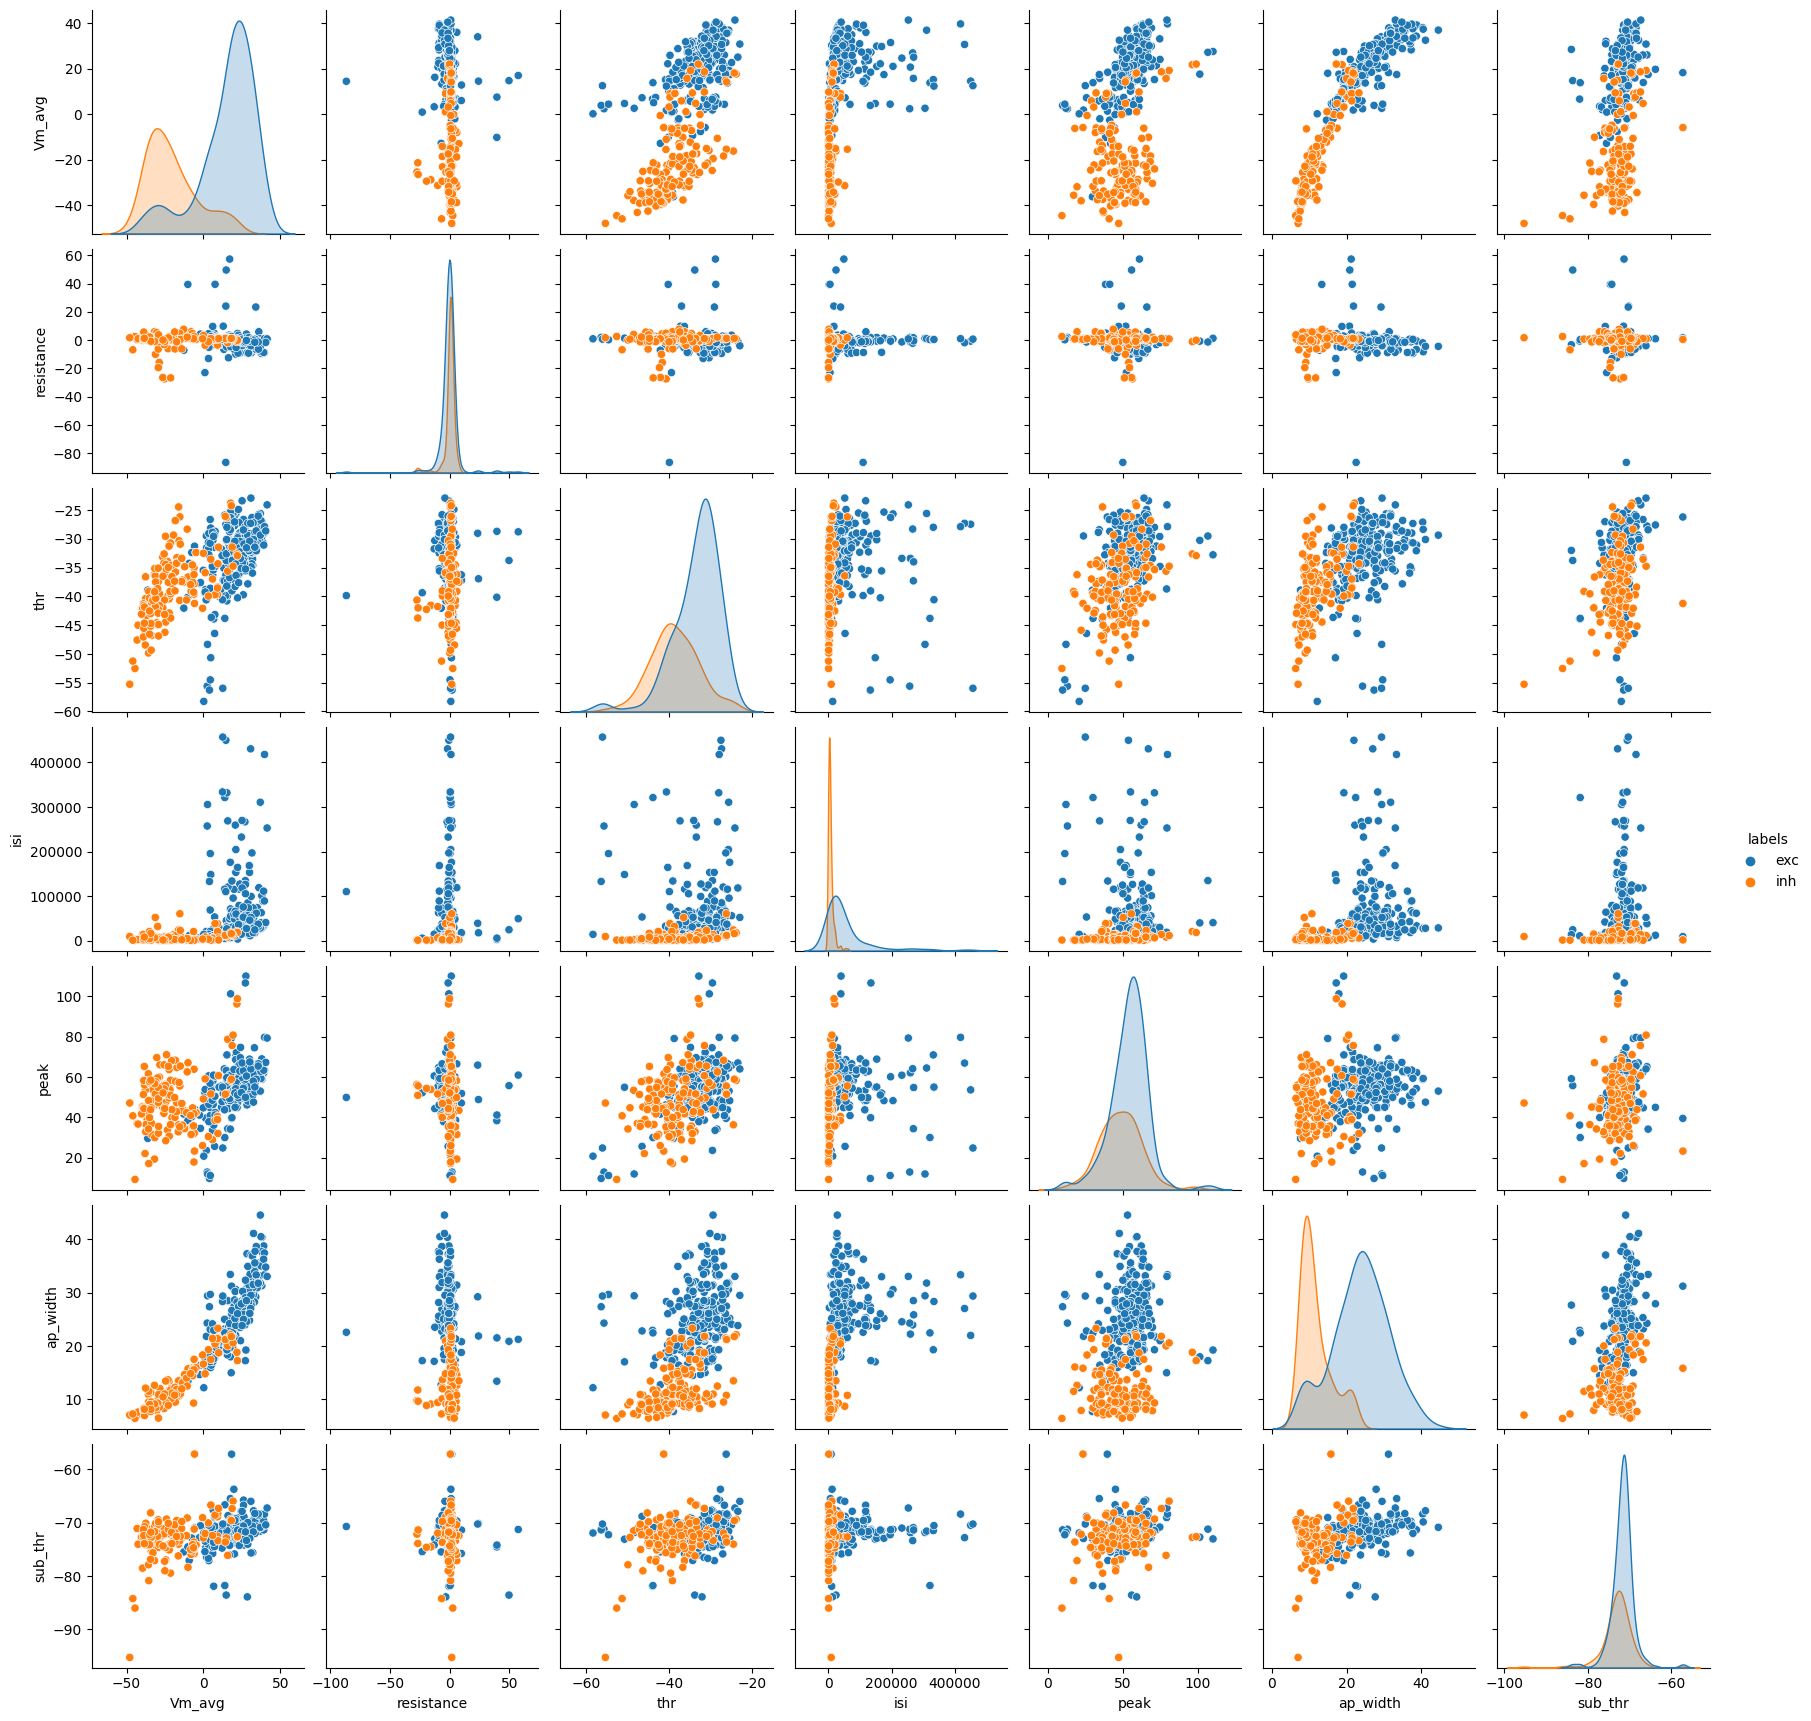

In [ ]:
sns.pairplot(df_comb[['Vm_avg', 'resistance', 'thr', 'isi', 'peak', 'ap_width',  'sub_thr','labels']],hue='labels')

In [ ]:
plt.scatter(x=np.arange(len(df_exc)),y=df_exc['thr'],data=df_exc)
plt.scatter(np.arange(len(df_inh['thr'])),df_inh['thr'])
plt.ylabel('Thresholds')
plt.title('excitatory v inhibitory')
plt.show()
plt.scatter(np.arange(len(df_exc['Vm_avg'])),df_exc['Vm_avg'])
plt.scatter(np.arange(len(df_inh['Vm_avg'])),df_inh['Vm_avg'])
plt.ylabel('Vm_avg')
plt.title('excitatory v inhibitory')

plt.show()
plt.scatter(df_exc['Vm_avg'],df_exc['thr'])
plt.scatter(df_inh['Vm_avg'],df_inh['thr'])
plt.xlabel('Vm_avg')
plt.ylabel('thresholds')
plt.title('excitatory v inhibitory')
plt.show()


5 0.0


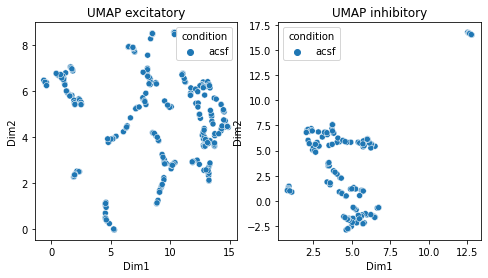

10 0.0


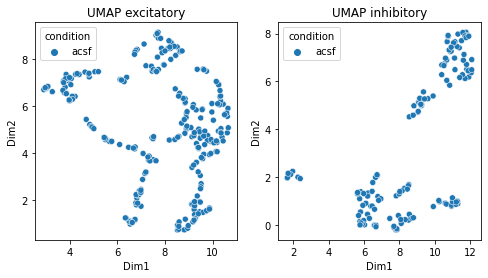

15 0.0


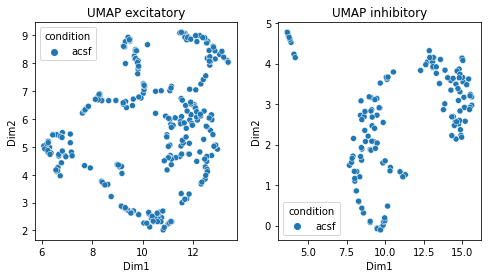

20 0.0


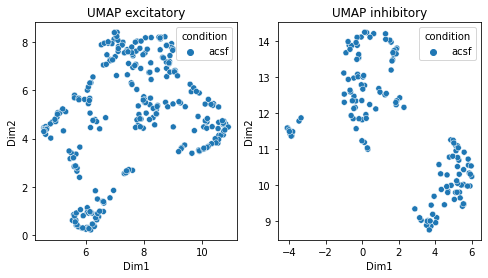

25 0.0


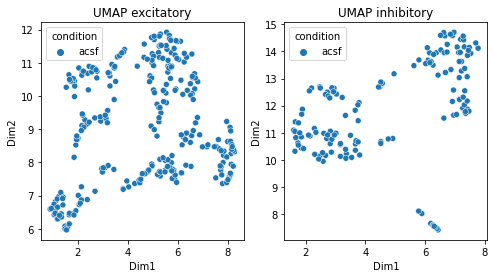

30 0.0


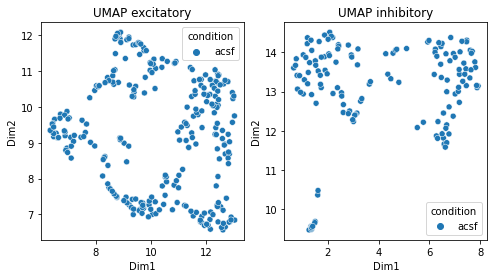

35 0.0


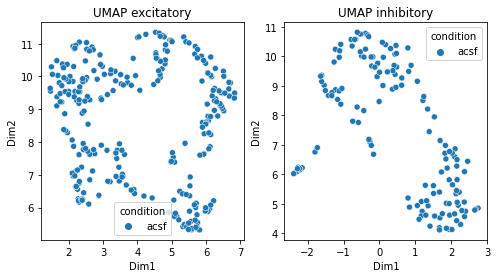

In [242]:
#@title create UMAP embeddings
feat = ['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr', 'imp']

df_exc = exc_df #pd.DataFrame(data_exc,columns=features)
df_inh = inh_df #pd.DataFrame(data_inh,columns=features)

ind_feat = [0,3,4,6,18,20]

neighbours  = np.arange(5,40,5)
# distances = np.arange(0.05,0.5,0.05)
distances = [0.0]
for n in neighbours:
    for dist in distances:
        print(n, dist)
        plot_UMAP(df_inh[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']],
                  df_exc[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']],
                  'blue','blue',
                  n,
                  dist,
                  np.repeat(['acsf'],len(df_inh)),np.repeat(['acsf'],len(df_exc)),
                  figsize=[8,4],
                  random_state=42)
                #   'blue','blue',n,dist,labels_inh,labels_exc,figsize=[8,4],random_state=65)


In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 35.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3580414 sha256=a8d72e974d1735a9049ba208fde483845c5c2555bc6ba362677860c12a27aa92
  Stored in directory: /root/.cache/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
Successfully built hdbscan


In [ ]:
#@title clustering the UMAP embeddings
data_exc = data_acsf_exc_all_conds
data_inh = data_acsf_inh_all_conds

df_exc = pd.DataFrame(data_exc,columns=features)
df_inh = pd.DataFrame(data_inh,columns=features)
ind_feat = [0,3,4,6,18,20]
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

data = df_exc[df_exc.columns[ind_feat]]
# db = DBSCAN(eps=0.01, min_samples=20).fit(data)
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=20,
).fit_predict(data)
print(labels)
# data['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
# sns.scatterplot(, data['Score'], hue=data['Labels'], 
#                 palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
# plt.title('DBSCAN with epsilon 11, min samples 6')
# plt.show()

np.unique(data['Labels'])

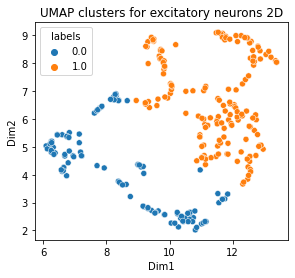

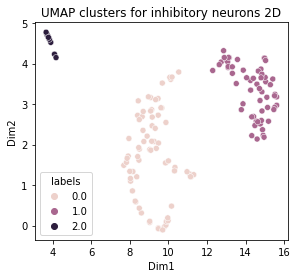

In [243]:
#@title clustering the UMAP embeddings

df_exc_NC = exc_df[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']] # df_all_conds_exc[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','thr']] #pd.DataFrame(data_exc,columns=features)
df_inh_NC = inh_df[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']]       #df_all_conds_inh[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','thr']] #pd.DataFrame(data_inh,columns=features)
ind_feat = [0,3,4,6,18,20]


labels_exc, labels_inh = plot_UMAP_clusters(df_inh_NC,
                                       df_exc_NC,
                                       15,
                                       0.0,
                                       condition_inh=np.repeat(['acsf'],len(df_inh_NC)),
                                       condition_exc=np.repeat(['acsf'],len(df_exc_NC)),
                                       k_inh=3,
                                       k_exc=2,
                                       random_state=42)



(array([0., 1., 2.]), array([73, 59, 11], dtype=int64))

In [249]:
#@title effect of noise
fac = 0.1
# data_exc = exc_df #data_acsf_exc_all_conds
# data_inh = inh_df #data_acsf_inh_all_conds

# df_exc_NC = pd.DataFrame(data_exc,columns=features)
# df_inh_NC = pd.DataFrame(data_inh,columns=features)

# data_exc_w_noise =data_exc +fac*np.random.randn(data_exc.shape[0],data_exc.shape[1])
# data_inh_w_noise =data_inh +fac*np.random.randn(data_inh.shape[0],data_inh.shape[1])

df_exc_NC = exc_df #pd.DataFrame(data_exc,columns=features)
df_inh_NC = inh_df #pd.DataFrame(data_inh,columns=features)

df_exc_NC_w_noise = exc_df # pd.DataFrame(data_exc_w_noise,columns=features)
df_inh_NC_w_noise = inh_df # pd.DataFrame(data_inh_w_noise,columns=features)


plot_UMAP(df_inh_NC,
            df_exc_NC,
            'blue','blue',15,0.0,labels_inh,labels_exc,figsize=[8,4],random_state=42)


plot_UMAP(df_inh_NC_w_noise[df_inh_NC_w_noise.columns[ind_feat]],
          df_exc_NC_w_noise[df_exc_NC_w_noise.columns[ind_feat]],
            'blue','blue',15,0.0,labels_inh,labels_exc,figsize=[8,4],random_state=42)

ValueError: could not convert string to float: 'NC_170711_aCSF_D1ago_E1'

In [ ]:
#@title effect of seed
df_exc_NC = pd.DataFrame(data_exc,columns=features)
df_inh_NC = pd.DataFrame(data_inh,columns=features)


plot_UMAP(df_inh_NC[df_inh_NC.columns[ind_feat]],
            df_exc_NC[df_exc_NC.columns[ind_feat]],
            'blue','blue',15,0.0,labels_inh,labels_exc,figsize=[8,4],random_state=42)

plot_UMAP(df_inh_NC[df_inh_NC.columns[ind_feat]],
            df_exc_NC[df_exc_NC.columns[ind_feat]],
            'blue','blue',15,0.0,labels_inh,labels_exc,figsize=[8,4],random_state=300)


ValueError: ignored

/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


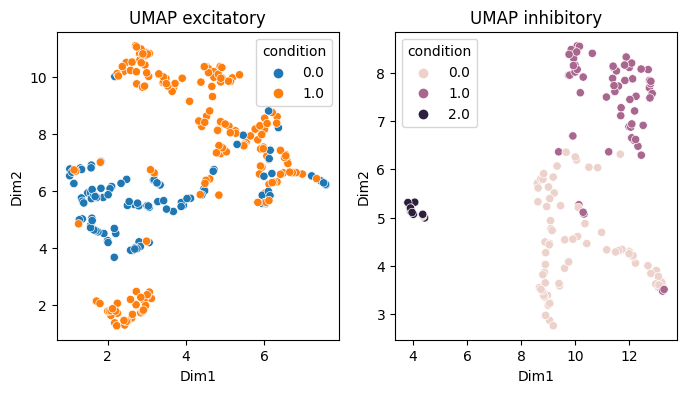

/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


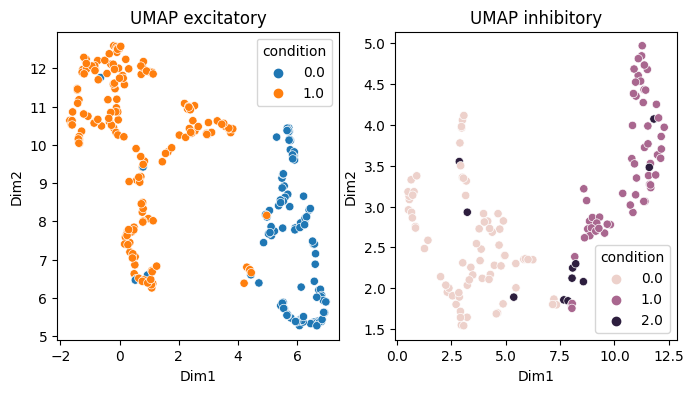

/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


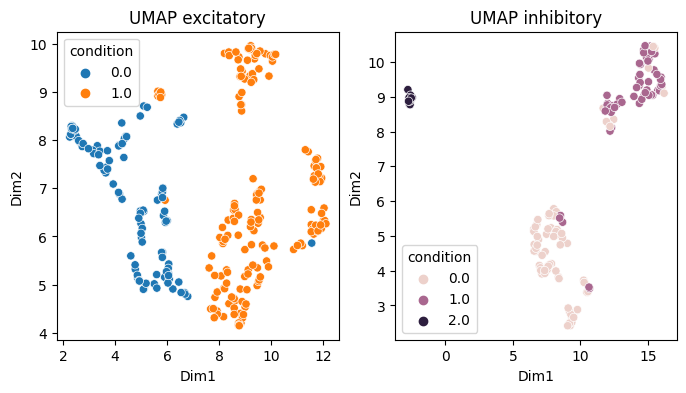

/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


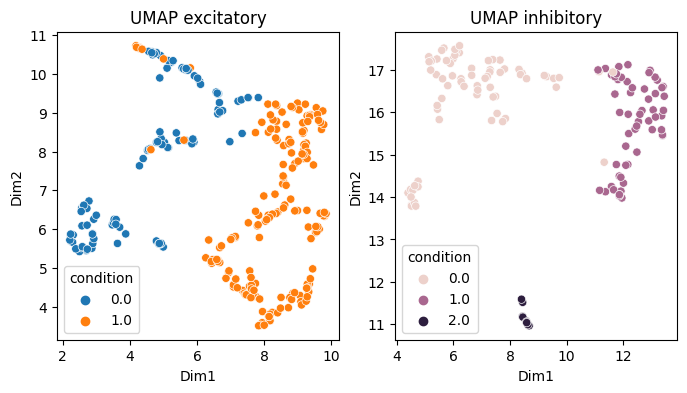

/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


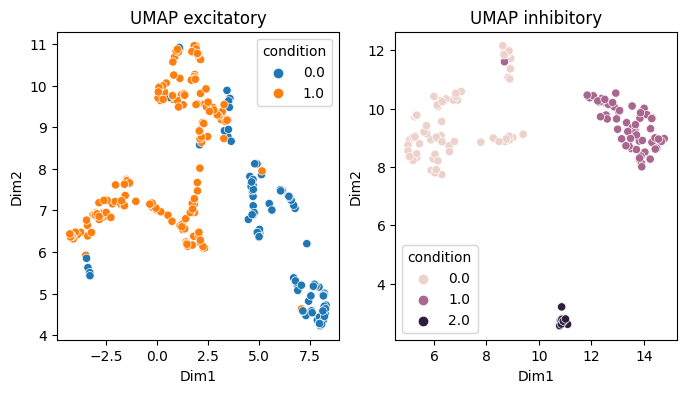

/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/usr/local/lib/python3.9/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


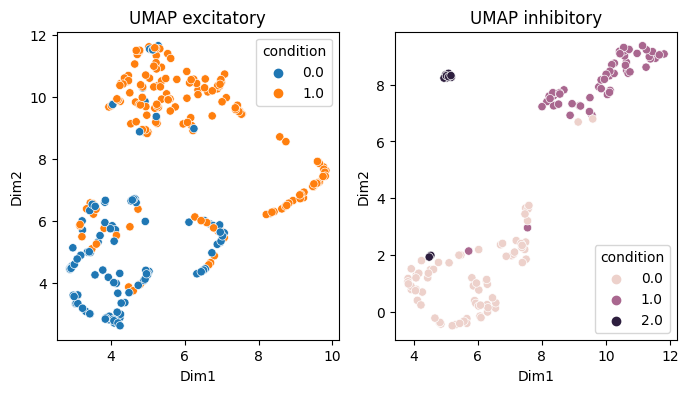

In [ ]:
for i in range(len(ind_feat)):
    inds = np.ones_like(ind_feat,dtype=bool)
    inds[i] = False
    plot_UMAP(df_inh_NC[df_inh_NC.columns[ind_feat][inds]],
            df_exc_NC[df_exc_NC.columns[ind_feat][inds]],
            'blue','blue',15,0.0,labels_inh,labels_exc,figsize=[8,4],random_state=200)
    

518

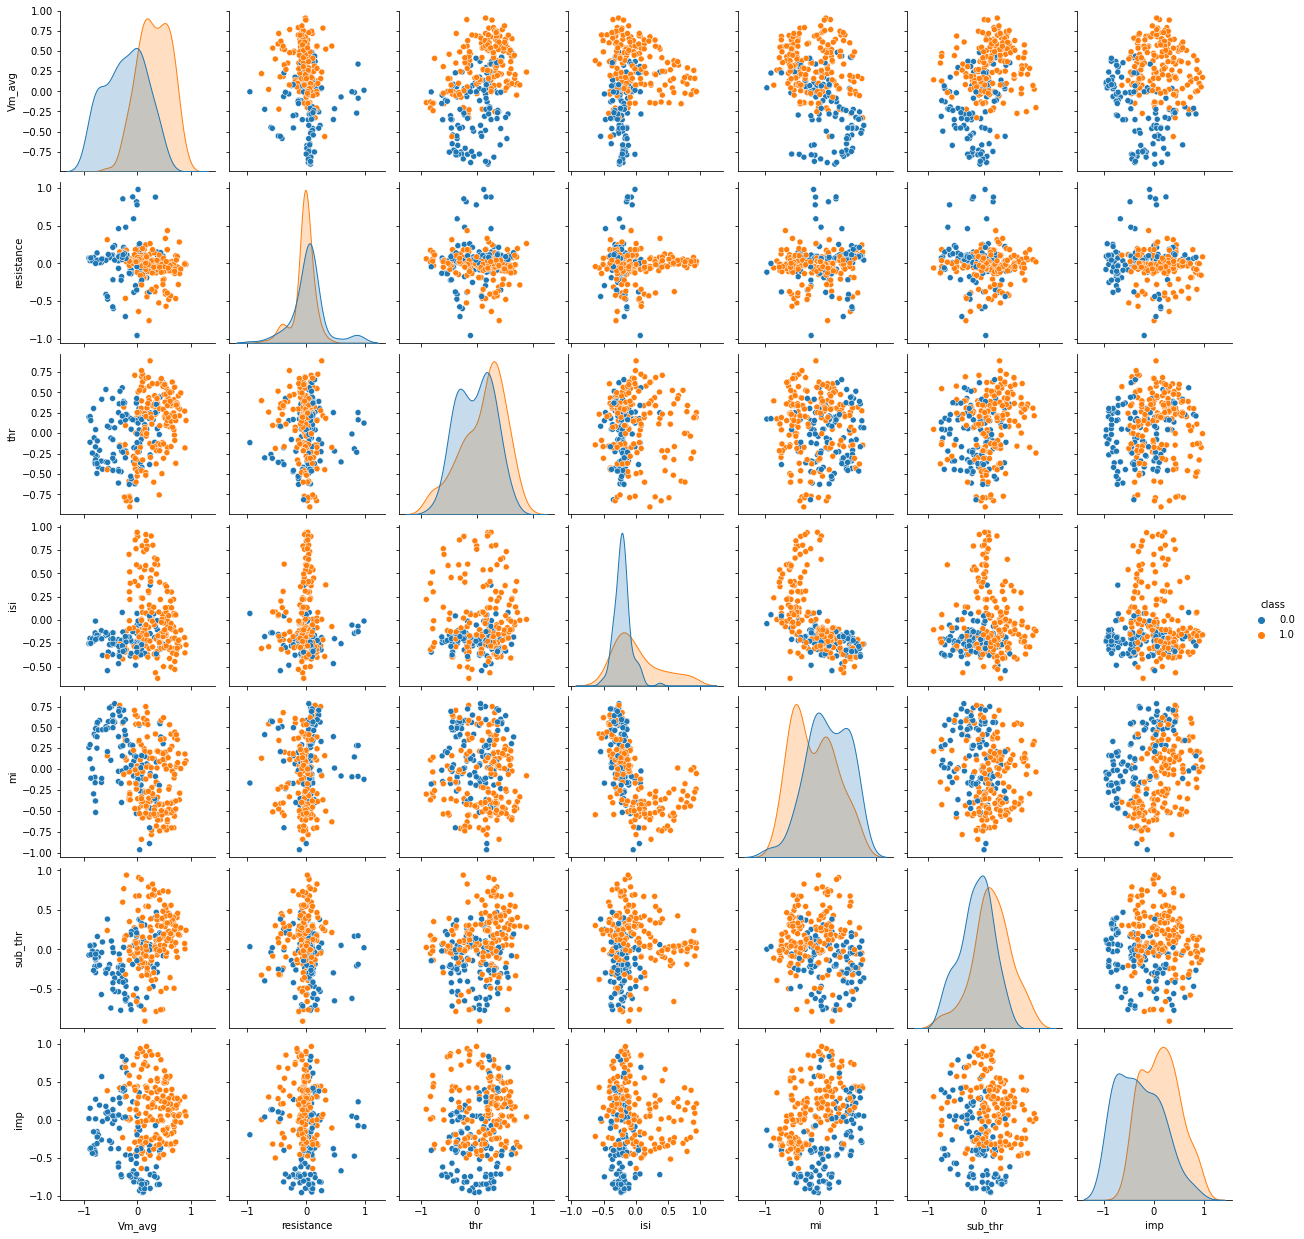

In [269]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
feat = ['Vm_avg', 'resistance', 'thr','mi', 'isi', 'sub_thr','imp']
df_exc = exc_df[['Vm_avg', 'resistance', 'thr', 'isi','mi', 'sub_thr','imp','exp_name']].reset_index(drop=True)
df = scaler.fit_transform(df_exc[feat])
df = normalize(df)
df_exc[feat] = df
df_exc['class'] = labels_exc

sns.pairplot(df_exc,
            hue='class',
            diag_kws = {'common_norm':False,
                        'common_grid':True,})
plt.show()

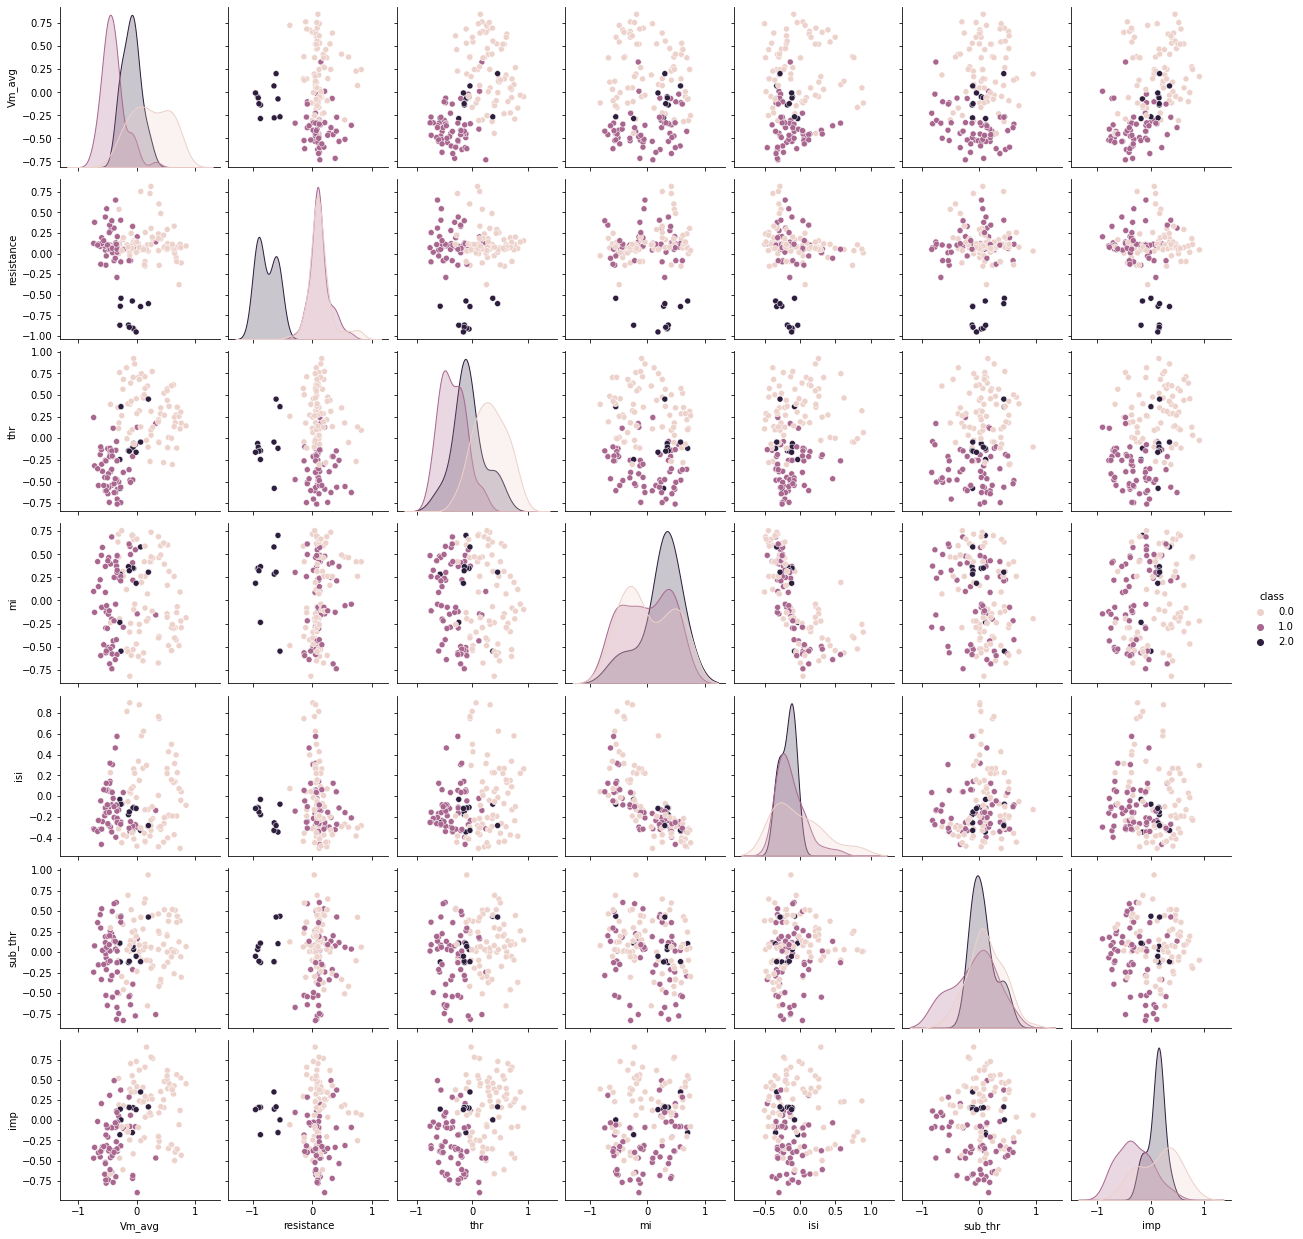

In [270]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
feat = ['Vm_avg', 'resistance', 'thr','mi', 'isi', 'sub_thr','imp']
df_inh = inh_df[['Vm_avg', 'resistance', 'thr','mi', 'isi', 'sub_thr','imp','exp_name']]
df = scaler.fit_transform(df_inh[feat])
df = normalize(df)
df_inh[feat] = df
df_inh['class'] = labels_inh

sns.pairplot(df_inh[['Vm_avg', 'resistance', 'thr','mi', 'isi', 'sub_thr','imp','class']],
                        hue='class',
                        diag_kws = {'common_norm':False,
                                    'common_grid':True,})
plt.show()

In [ ]:
from statannotations.Annotator import Annotator


In [ ]:
from itertools import combinations


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.252e-24 U_stat=2.585e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.245e-04 U_stat=1.145e+04
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.628e-04 U_stat=6.833e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

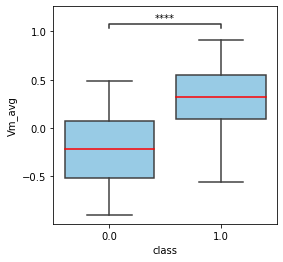

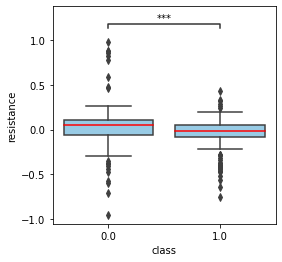

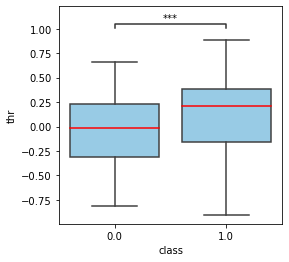

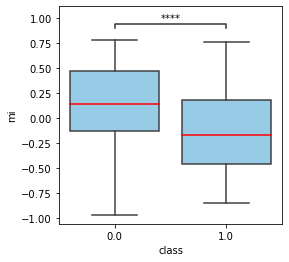

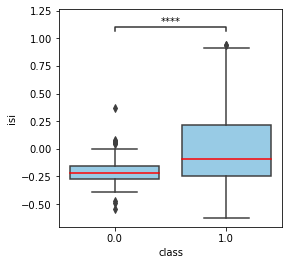

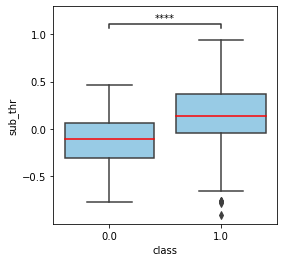

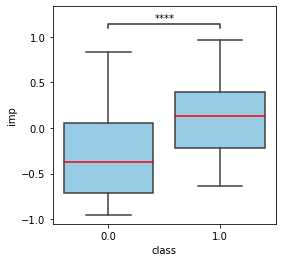

In [301]:
from statannotations.Annotator import Annotator

def plot_significance(data,var,hue):
    fig = plt.figure(figsize=[4,4])
    ax =fig.add_subplot()
    sns.boxplot(data=data,
                x=hue,
                y=var,
                boxprops={"facecolor": (.2, .6, .8, .5)},
                medianprops={"color": "red"},ax=ax)                            

    pairs = np.unique(data[hue])
    pairs = [i for i in combinations(np.arange(0.,len(pairs)),2)]


    annotator = Annotator(ax,pairs, data=data, x=hue, y=var)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()  

ind_feat = [0,3,4,6,9,17,20]
for i in df_exc[['Vm_avg', 'resistance', 'thr','mi', 'isi', 'sub_thr','imp']]:
    plot_significance(df_exc,i,'class')


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.823e-19 U_stat=4.115e+03
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.194e-05 U_stat=6.100e+01
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.918e-03 U_stat=6.360e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.083e-01 U_stat=2.100e+03
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.708e-07 U_stat=6.490e+02
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.055e-07 U_stat=8.030e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.0

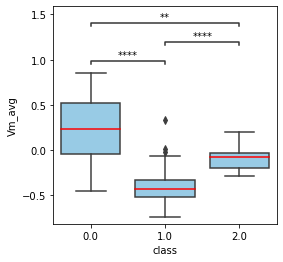

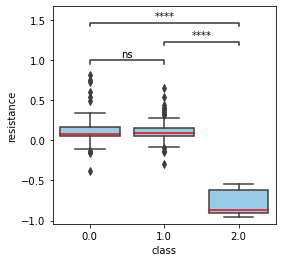

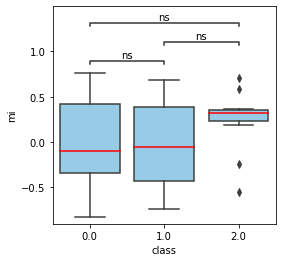

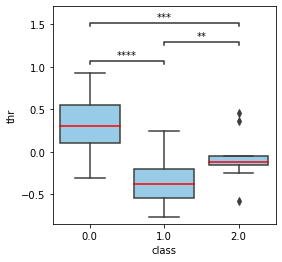

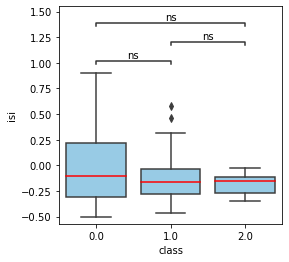

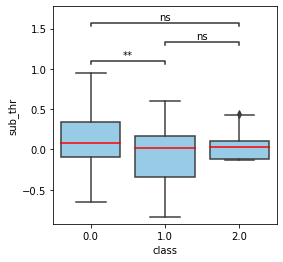

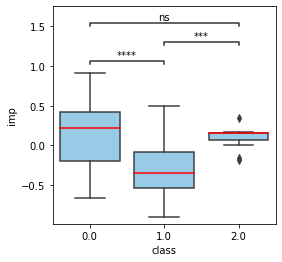

In [302]:
for i in df_inh[['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']]:
    plot_significance(df_inh,i,'class')

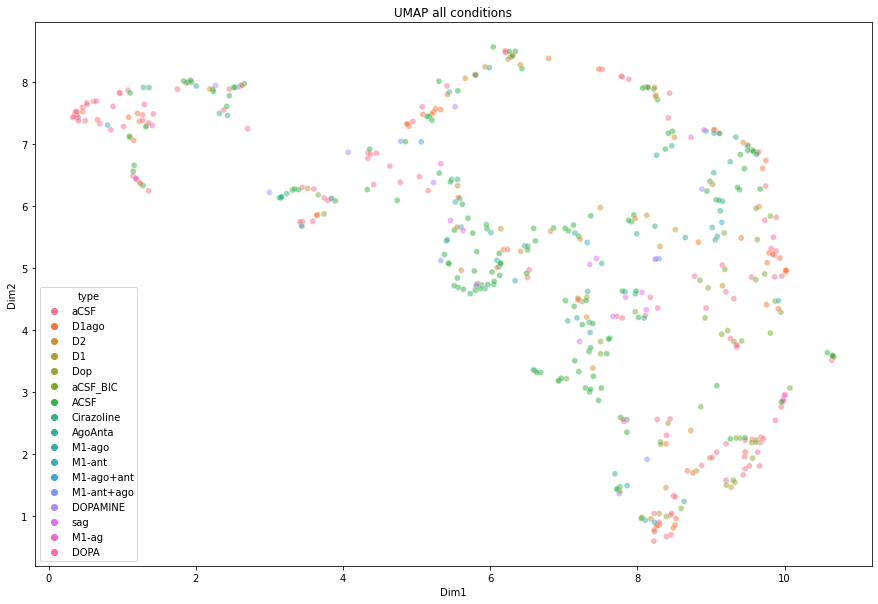

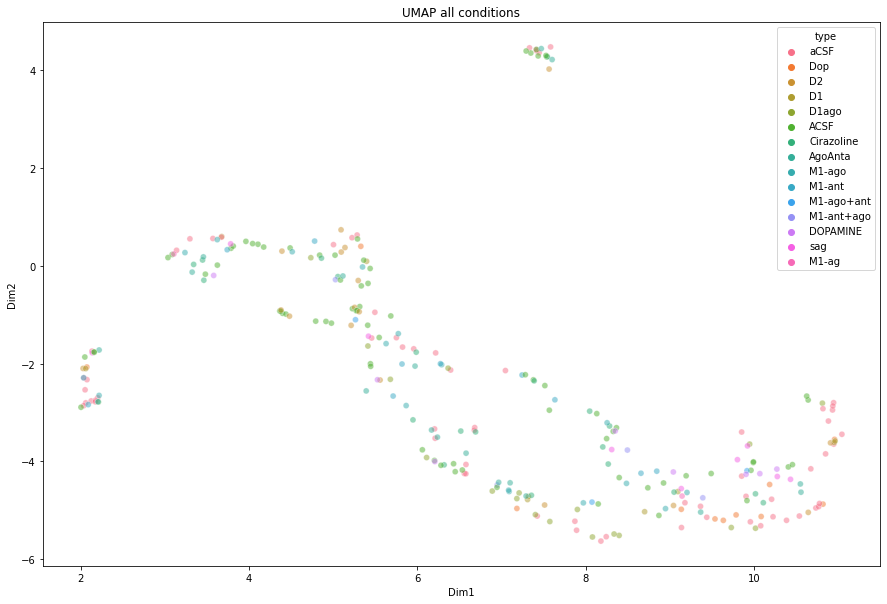

In [367]:
exc = data_all_conds['exc']
inh = data_all_conds['inh']
exc_df_all = pd.DataFrame(exc,columns = features_ext)
exc_df_all = exc_df_all.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
exc_df_all = exc_df_all.reset_index(drop=False)
inh_df_all = pd.DataFrame(inh,columns = features_ext)
inh_df_all = inh_df_all.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
inh_df_all = inh_df_all.reset_index(drop=False)
plot_UMAP_all_conds(exc_df_all[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']],labels=exc_df_all['cond'],neighbours=15,distance=0.0,random_state=0,figsize=[15,10])
plot_UMAP_all_conds(inh_df_all[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']],labels=inh_df_all['cond'],neighbours=15,distance=0.0,random_state=0,figsize=[15,10])


In [420]:
def modify_cond_list(cond):
    if cond in ['aCSF','ACSF']:
        return  cond.lower()
    elif cond.lower() in ['d1','d1ago']:
        return 'd1ago'
    elif cond.lower() in ['dop','dopamine']:
        return 'dopamine'
    elif cond.lower() in ['m1-ag', 'm1-ago', 'm1-ago+ant', 'm1-ant', 'm1-ant+ago']:
        return 'm1'
    else:
        return cond.lower()        
def plot_significance_new(data,var,hue,ax):

    sns.boxplot(data=data,
                x=hue,
                y=var,
                boxprops={"facecolor": (.2, .6, .8, .5)},
                medianprops={"color": "red"},ax=ax)                            

    pairs = np.unique(data[hue])
    pairs = [i for i in combinations(pairs,2)]


    annotator = Annotator(ax,pairs, data=data, x=hue, y=var)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()  

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.874e-18 U_stat=4.581e+03
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.188e-05 U_stat=1.070e+02
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.549e-03 U_stat=7.260e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.375e-01 U_stat=2.652e+03
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.526e-06 U_stat=7.220e+02
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.409e-07 U_stat=8.870e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.0

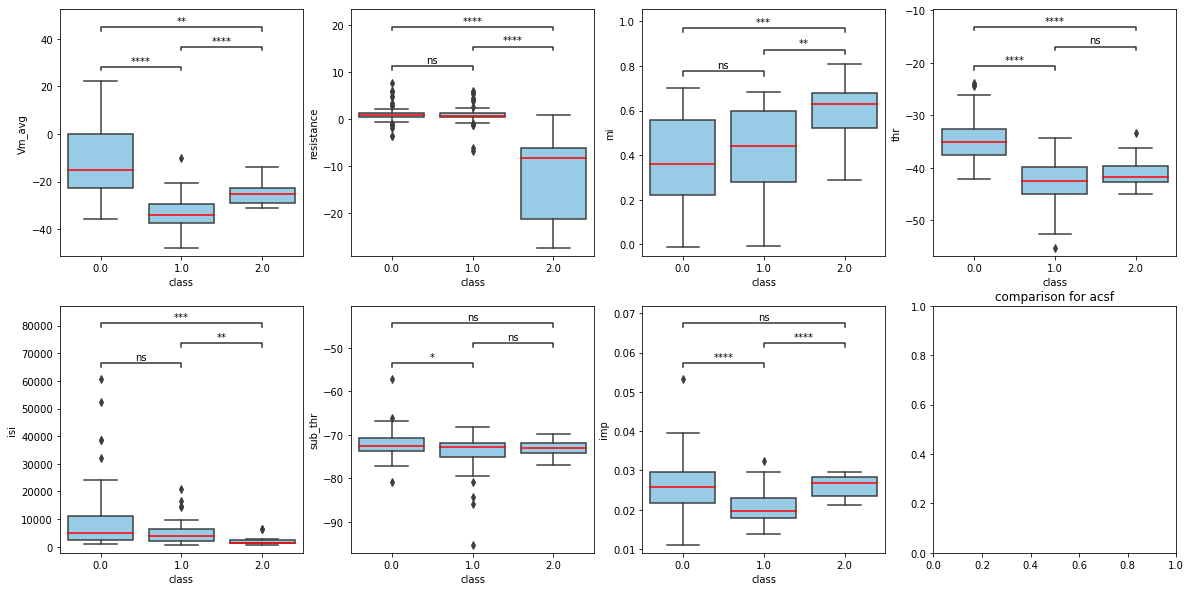

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.615e-01 U_stat=8.350e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.914e-01 U_stat=1.200e+01
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.676e-01 U_stat=6.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.076e-01 U_stat=5.550e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.888e-01 U_stat=8.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.433e-01 U_stat=2.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.0

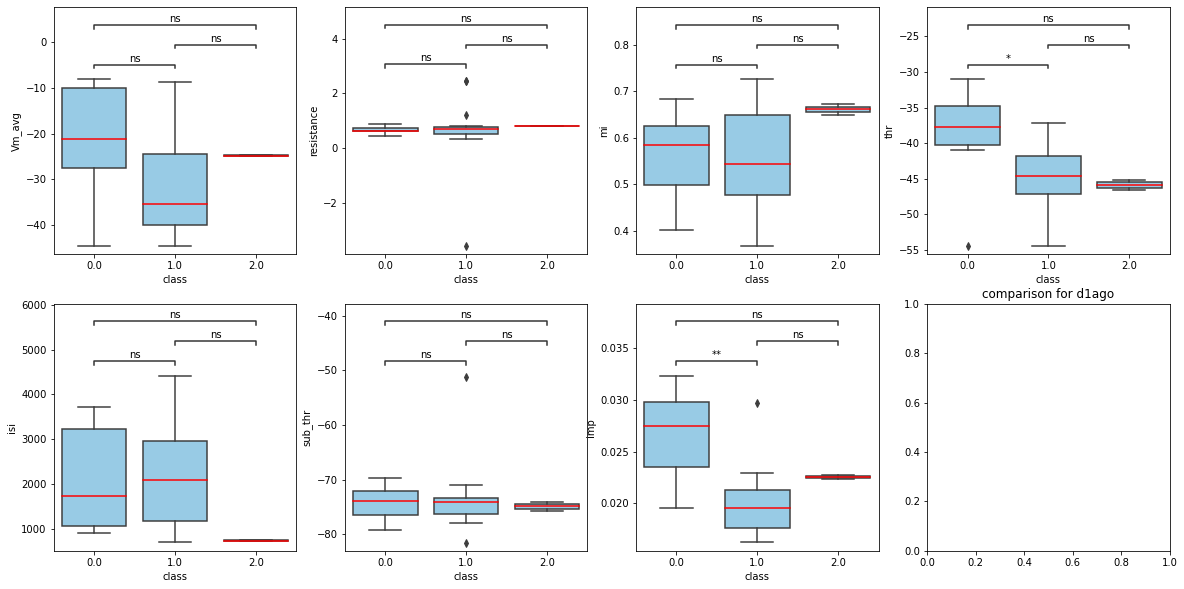

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.786e-02 U_stat=2.600e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.976e-01 U_stat=2.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.403e-01 U_stat=2.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.825e-01 U_stat=2.000e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.179e-01 U_stat=1.100e+01
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.403e-01 U_stat=2.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.0

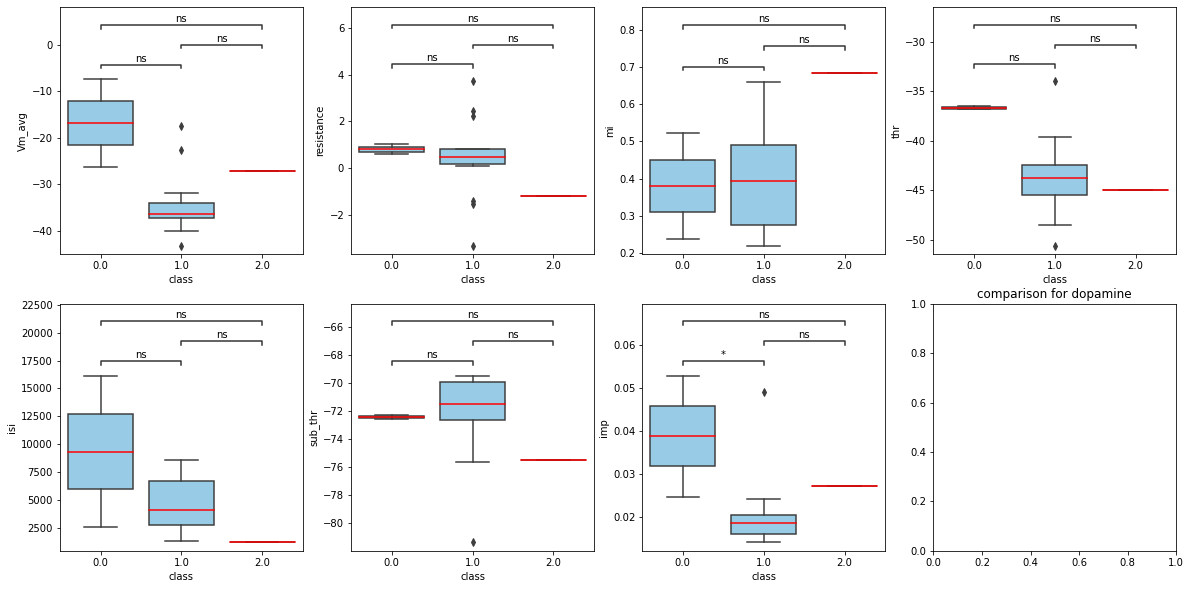

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.000e-03 U_stat=4.900e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.694e-03 U_stat=5.000e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.815e-01 U_stat=3.000e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

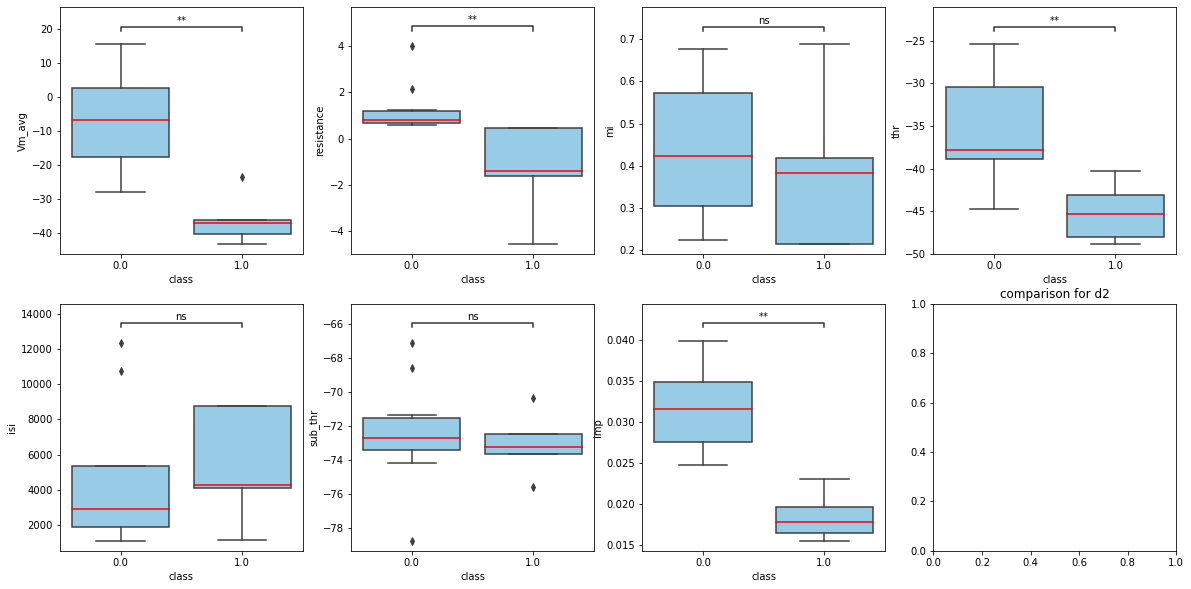

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.509e-03 U_stat=4.600e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.209e-02 U_stat=1.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.186e-01 U_stat=1.200e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.200e-01 U_stat=3.400e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.846e-01 U_stat=1.900e+01
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.281e-02 U_stat=1.700e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.0

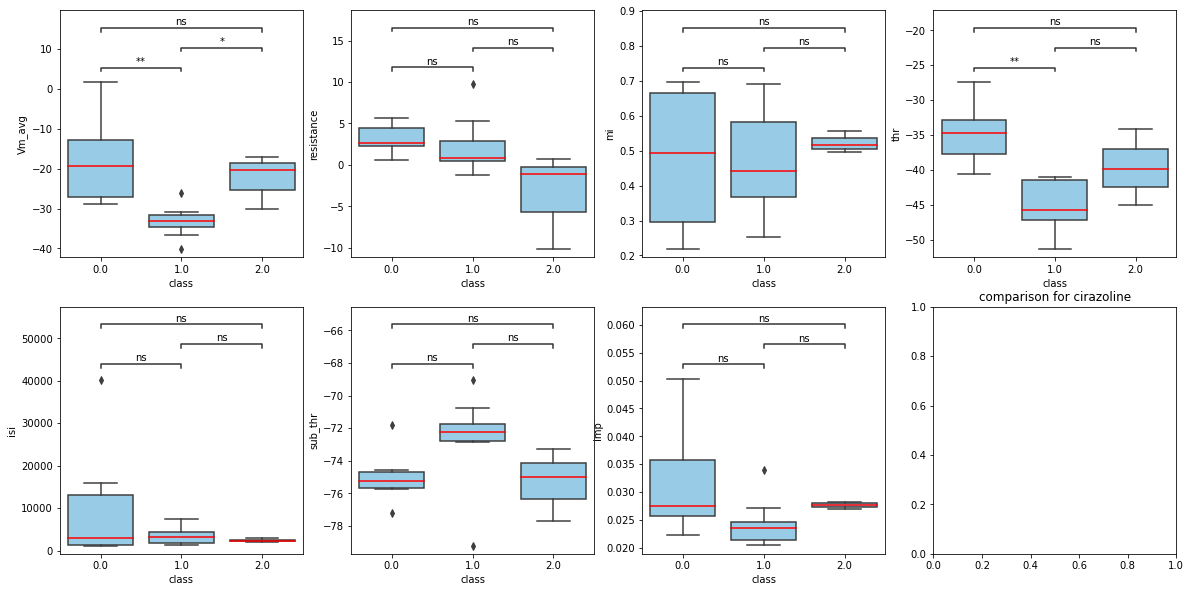

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.976e-02 U_stat=2.600e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.722e-02 U_stat=3.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.852e-01 U_stat=9.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.193e-01 U_stat=2.100e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.366e-01 U_stat=1.700e+01
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.123e-01 U_stat=1.200e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.0

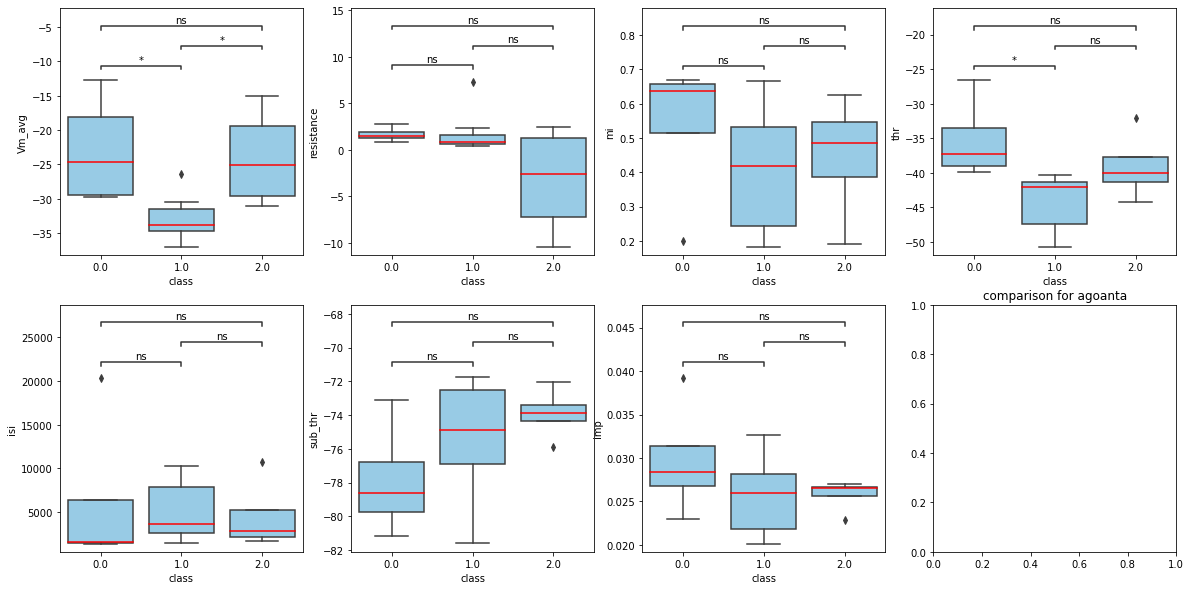

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.053e-06 U_stat=2.800e+02
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.207e-02 U_stat=0.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.594e-02 U_stat=4.000e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:7.661e-01 U_stat=1.490e+02
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.315e-01 U_stat=4.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:7.669e-02 U_stat=4.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.0

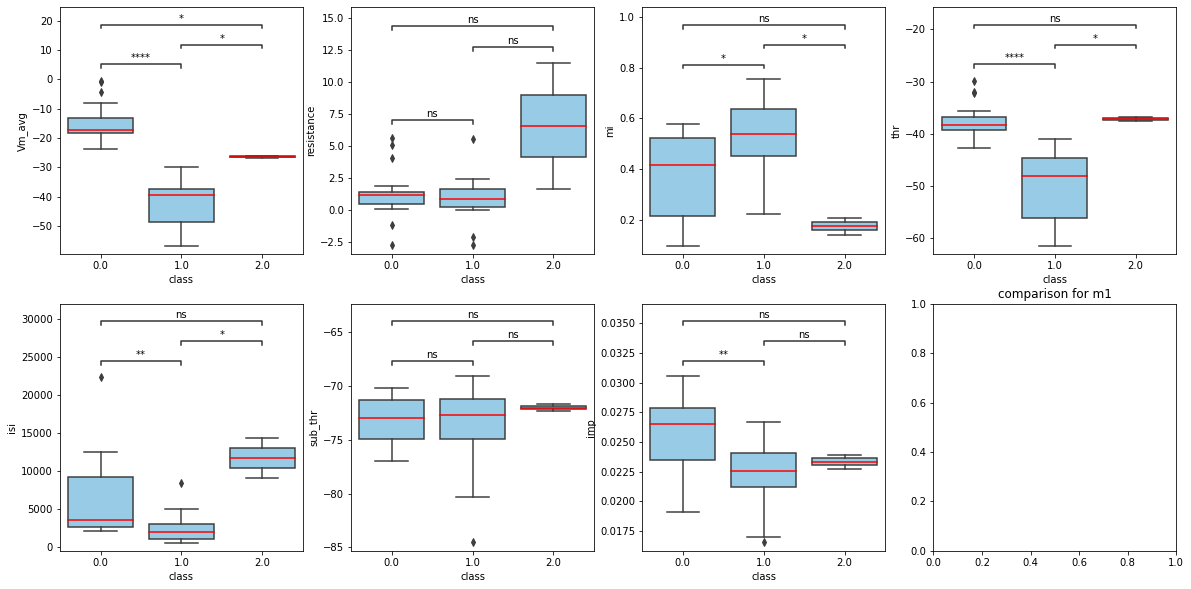

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.619e-02 U_stat=1.800e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.025e-01 U_stat=1.000e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.025e-01 U_stat=9.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

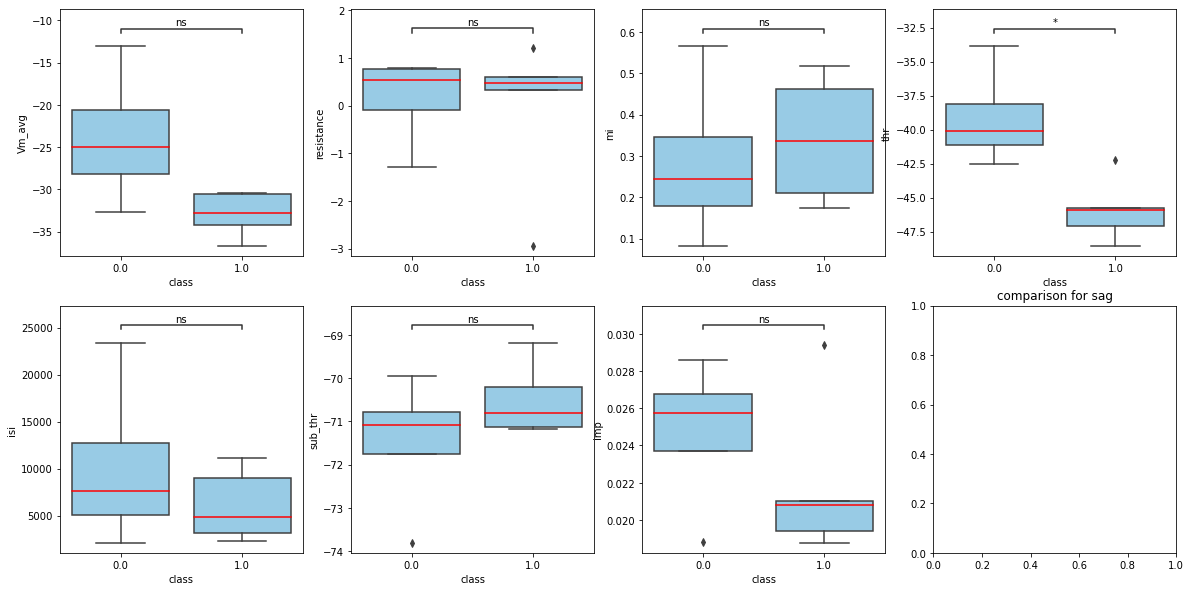

In [421]:

for cond_i in conds_inh:
    fig,ax = plt.subplots(2,4,figsize=[20,10])
    for i,val in enumerate(['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']):
        if i<4:
            plot_significance_new(data = df_inh_for_sig[df_inh_for_sig.cond==cond_i],var = val,hue = 'class',ax = ax[0,i])
        else:
            plot_significance_new(data = df_inh_for_sig[df_inh_for_sig.cond==cond_i],var = val,hue = 'class',ax = ax[1,i-4])
    plt.title('comparison for '+cond_i)
    plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.368e-23 U_stat=3.754e+03
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.861e-03 U_stat=1.369e+04
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.394e-05 U_stat=1.439e+04
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

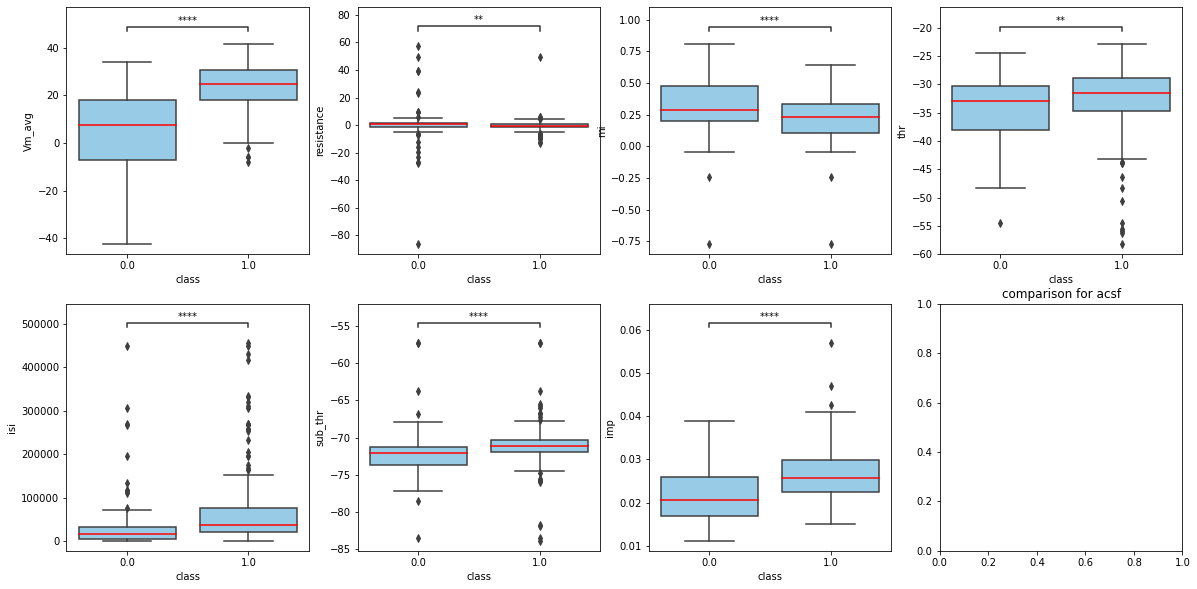

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.164e-01 U_stat=2.600e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:7.239e-01 U_stat=3.600e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.588e-01 U_stat=4.600e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

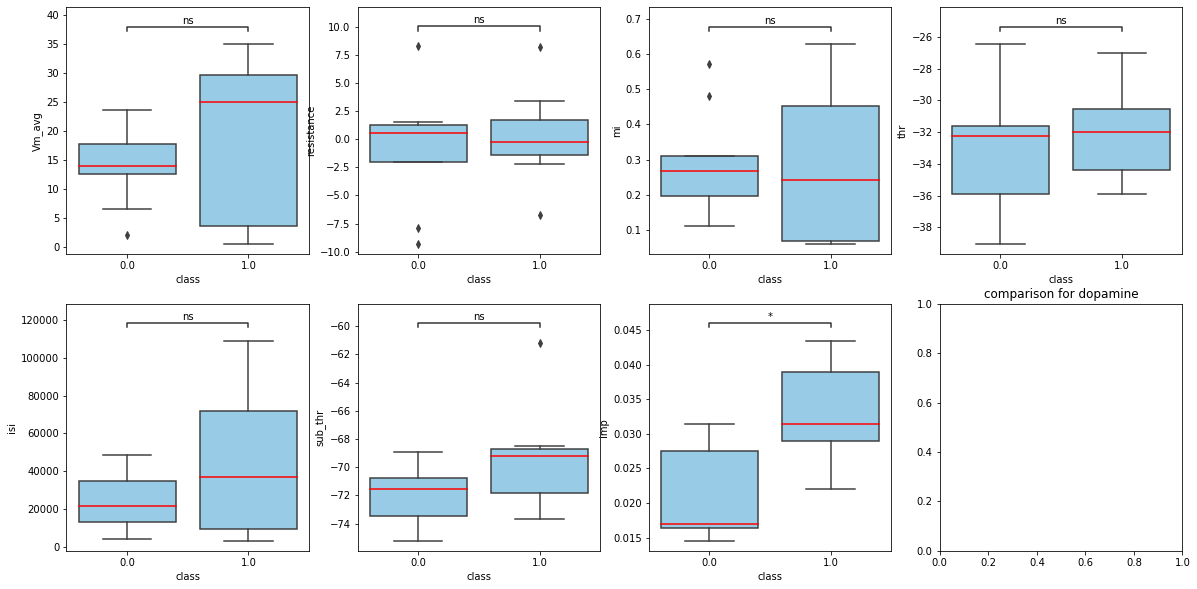

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.474e-03 U_stat=3.900e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.591e-01 U_stat=1.590e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.968e-02 U_stat=2.090e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

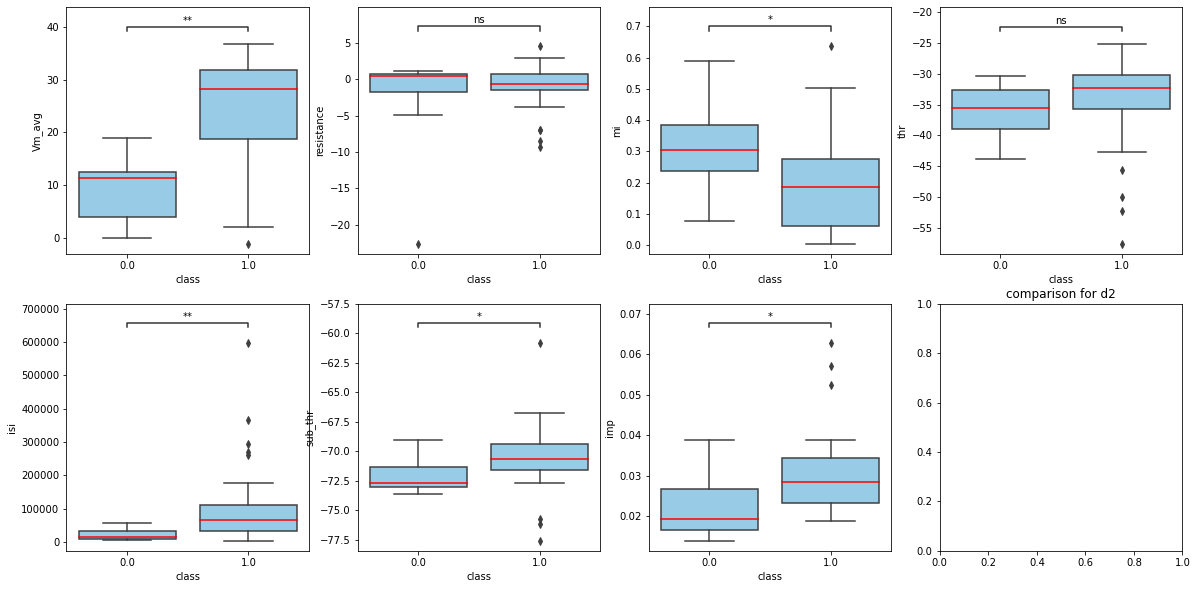

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.879e-03 U_stat=2.255e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.562e-01 U_stat=4.715e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.415e-01 U_stat=3.805e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

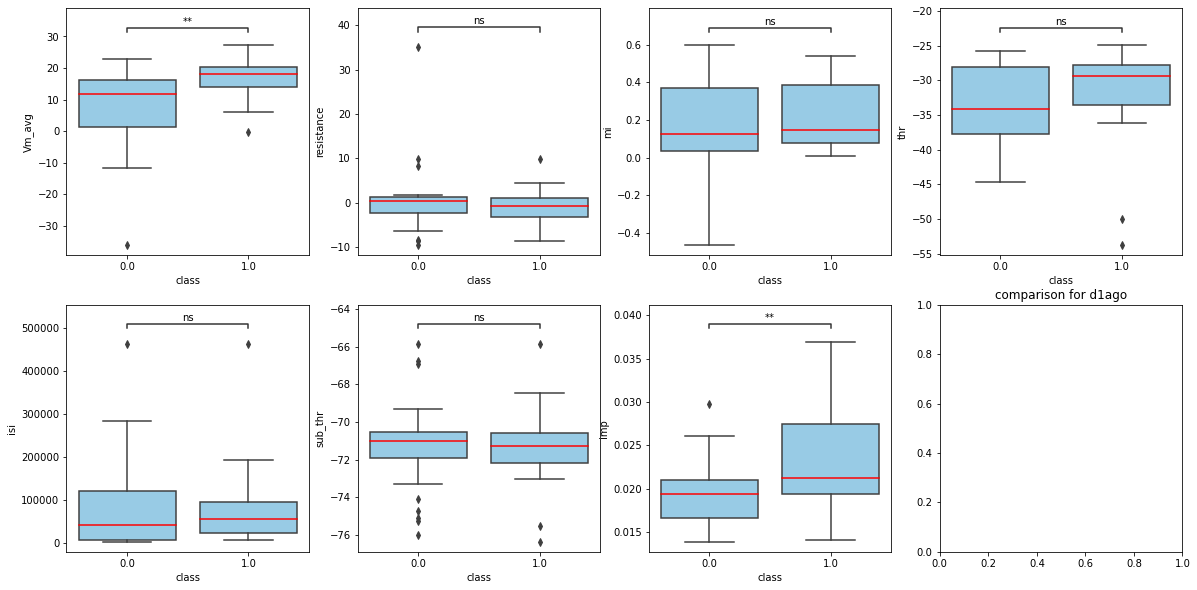

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.647e-02 U_stat=3.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.636e-01 U_stat=2.300e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.231e-01 U_stat=1.700e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

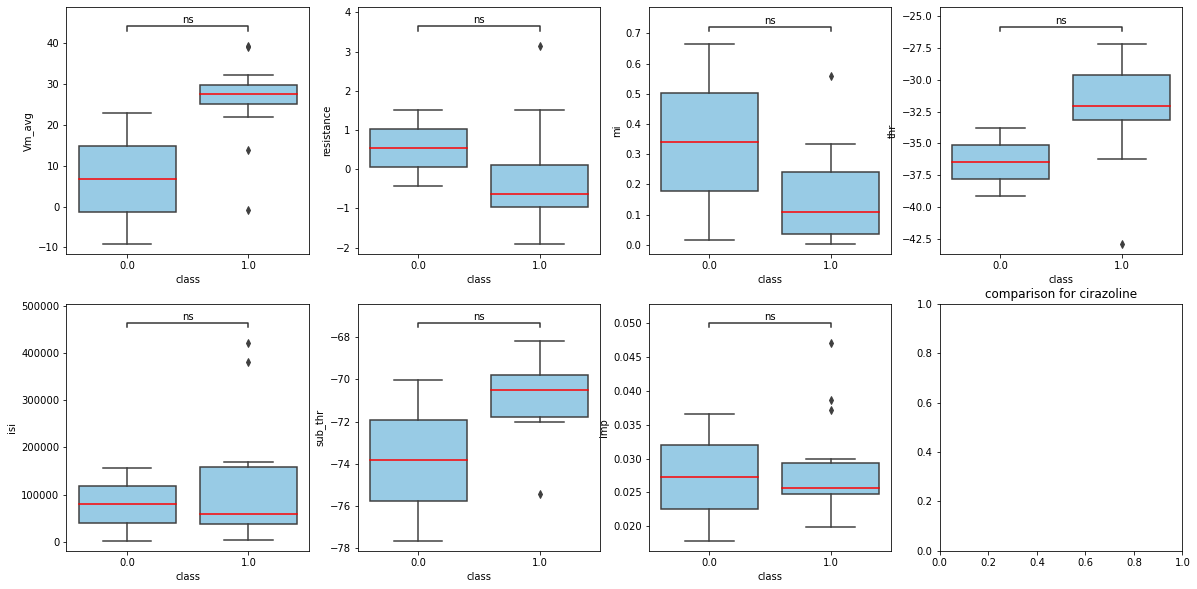

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.523e-02 U_stat=1.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:7.842e-01 U_stat=1.400e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.228e-01 U_stat=1.600e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

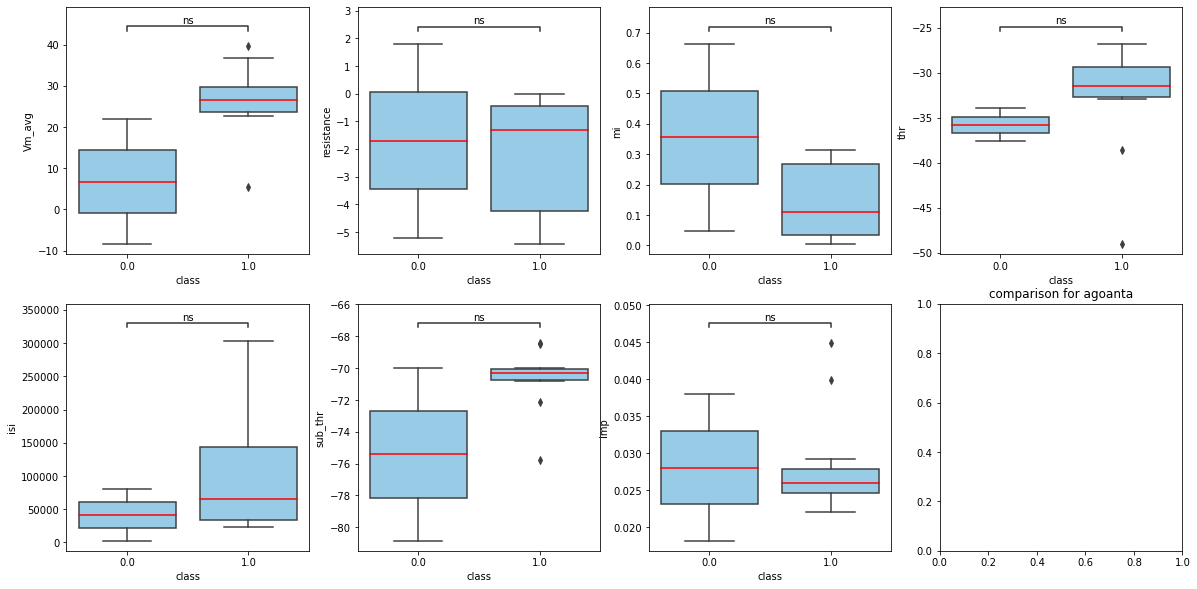

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.810e-02 U_stat=5.700e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:7.177e-01 U_stat=1.020e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.919e-01 U_stat=1.350e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

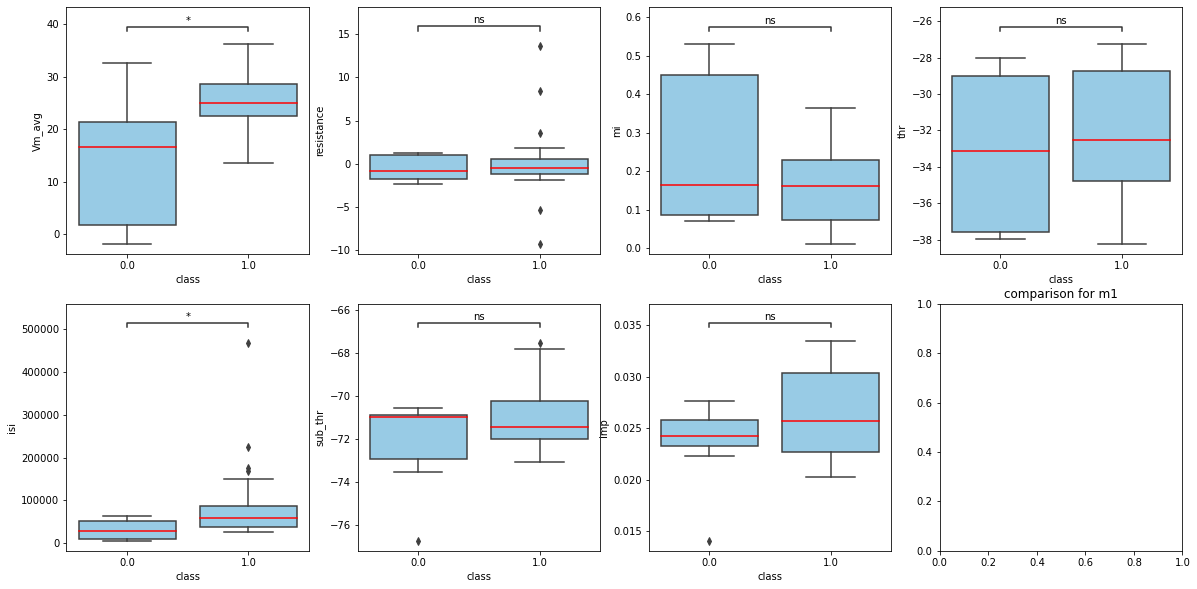

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.049e-01 U_stat=7.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.049e-01 U_stat=7.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:7.998e-01 U_stat=1.700e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitne

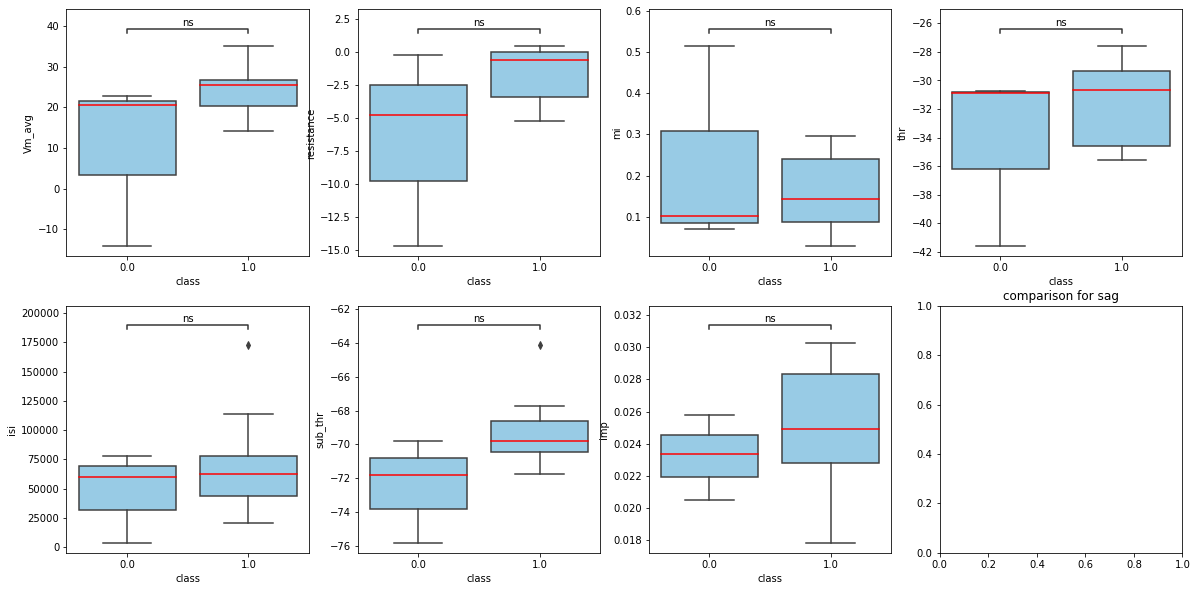

In [431]:

for cond_i in conds_exc:
    fig,ax = plt.subplots(2,4,figsize=[20,10])
    for i,val in enumerate(['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']):
        if i<4:
            plot_significance_new(data = df_exc_for_sig[df_exc_for_sig.cond==cond_i],var = val,hue = 'class',ax = ax[0,i])
        else:
            plot_significance_new(data = df_exc_for_sig[df_exc_for_sig.cond==cond_i],var = val,hue = 'class',ax = ax[1,i-4])
    plt.title('comparison for '+cond_i)
    plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d2_0.0 vs. d2_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.474e-03 U_stat=3.900e+01
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.368e-23 U_stat=3.754e+03


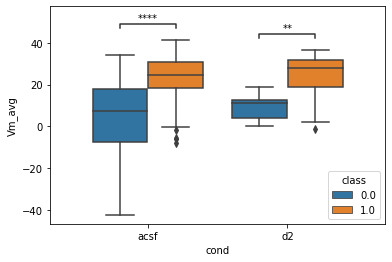

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d2_0.0 vs. d2_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.591e-01 U_stat=1.590e+02
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.861e-03 U_stat=1.369e+04


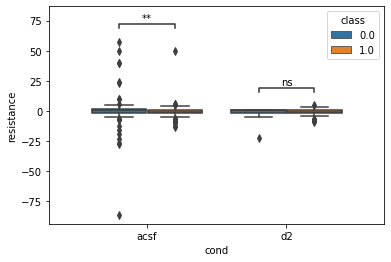

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d2_0.0 vs. d2_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.968e-02 U_stat=2.090e+02
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.394e-05 U_stat=1.439e+04


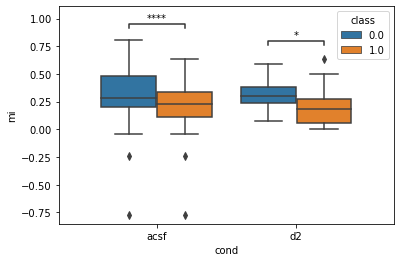

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d2_0.0 vs. d2_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.571e-01 U_stat=9.700e+01
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.088e-03 U_stat=8.970e+03


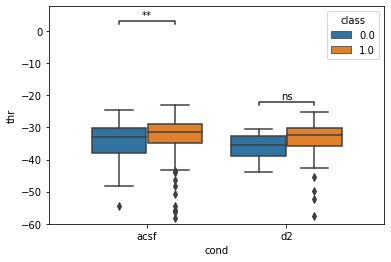

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d2_0.0 vs. d2_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.486e-03 U_stat=5.700e+01
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.800e-12 U_stat=5.990e+03


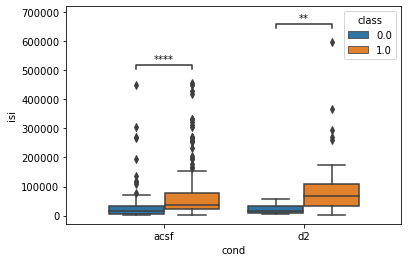

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d2_0.0 vs. d2_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.193e-02 U_stat=7.300e+01
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.184e-08 U_stat=7.100e+03


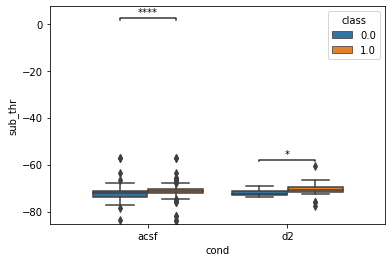

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d2_0.0 vs. d2_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.532e-02 U_stat=7.000e+01
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.442e-11 U_stat=6.294e+03


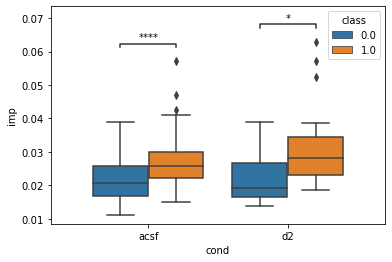

In [475]:
for var  in ['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:
    cond = 'd2'
    data_temp = df_exc_for_sig[df_exc_for_sig.cond.isin(['acsf',cond])]

    ax = sns.boxplot(data=data_temp,
                x='cond',
                y=var,
                hue = 'class',)
                # boxprops={"facecolor": (.2, .6, .8, .5)},
                # medianprops={"color": "red"},ax=ax)                            

    pairs = np.unique(data_temp['class'])
    pairs = [(("acsf", 0.0), ("acsf", 1.0)),
            ((cond, 0.0), (cond, 1.0))]


    annotator = Annotator(ax,pairs, data=data_temp, x='cond', y=var,hue='class')
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()  
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d1ago_1.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.914e-01 U_stat=1.200e+01
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.874e-18 U_stat=4.581e+03
acsf_1.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.188e-05 U_stat=1.070e+02
d1ago_0.0 vs. d1ago_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.615e-01 U_stat=8.350e+01
d1ago_0.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.676e-01 U_stat=6.000e+00
acsf_0.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.549e-03 U_stat=7.260e+02


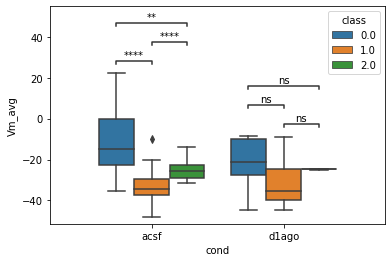

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d1ago_1.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.888e-01 U_stat=8.000e+00
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.375e-01 U_stat=2.652e+03
acsf_1.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.526e-06 U_stat=7.220e+02
d1ago_0.0 vs. d1ago_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.076e-01 U_stat=5.550e+01
d1ago_0.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.433e-01 U_stat=2.000e+00
acsf_0.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.409e-07 U_stat=8.870e+02


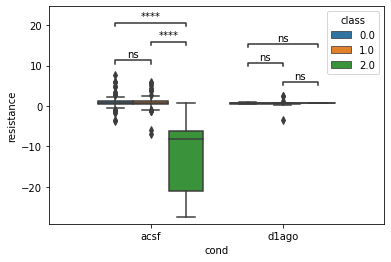

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d1ago_1.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.888e-01 U_stat=8.000e+00
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.059e-01 U_stat=2.073e+03
acsf_1.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.745e-03 U_stat=1.800e+02
d1ago_0.0 vs. d1ago_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.515e-01 U_stat=6.150e+01
d1ago_0.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.433e-01 U_stat=2.000e+00
acsf_0.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.783e-04 U_stat=1.750e+02


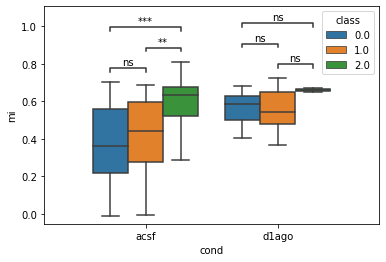

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d1ago_1.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.892e-01 U_stat=2.400e+01
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.805e-18 U_stat=4.570e+03
acsf_1.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.343e-01 U_stat=3.000e+02
d1ago_0.0 vs. d1ago_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.850e-02 U_stat=9.450e+01
d1ago_0.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.433e-01 U_stat=1.000e+01
acsf_0.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.417e-05 U_stat=8.140e+02


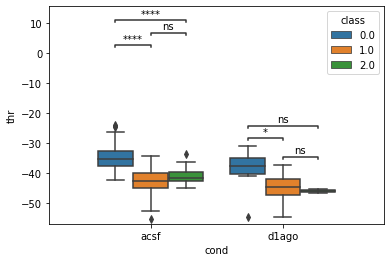

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d1ago_1.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:7.652e-02 U_stat=3.600e+01
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.088e-02 U_stat=2.936e+03
acsf_1.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.712e-03 U_stat=5.950e+02
d1ago_0.0 vs. d1ago_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.076e-01 U_stat=5.550e+01
d1ago_0.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.675e-02 U_stat=1.200e+01
acsf_0.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.420e-04 U_stat=7.550e+02


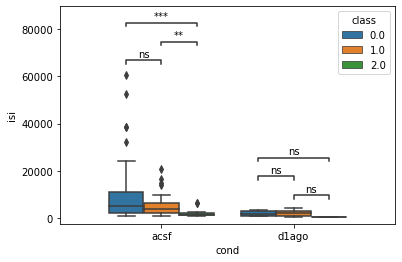

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d1ago_1.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.639e-01 U_stat=2.200e+01
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.160e-02 U_stat=3.074e+03
acsf_1.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:5.834e-01 U_stat=3.450e+02
d1ago_0.0 vs. d1ago_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.551e-01 U_stat=6.350e+01
d1ago_0.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.676e-01 U_stat=7.000e+00
acsf_0.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.101e-01 U_stat=5.470e+02


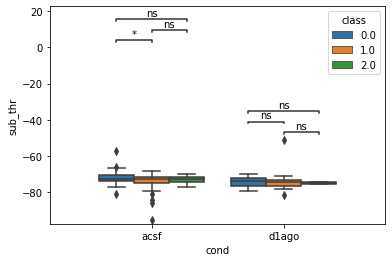

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

d1ago_1.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.888e-01 U_stat=8.000e+00
acsf_0.0 vs. acsf_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:7.240e-07 U_stat=3.661e+03
acsf_1.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.688e-05 U_stat=1.080e+02
d1ago_0.0 vs. d1ago_1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.161e-03 U_stat=1.055e+02
d1ago_0.0 vs. d1ago_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.433e-01 U_stat=1.000e+01
acsf_0.0 vs. acsf_2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.241e-01 U_stat=4.430e+02


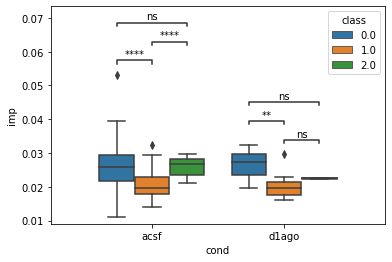

In [478]:
for var  in ['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:
    cond = 'd1ago'
    data_temp = df_inh_for_sig[df_inh_for_sig.cond.isin(['acsf',cond])]

    ax = sns.boxplot(data=data_temp,
                x='cond',
                y=var,
                hue = 'class',)
                # boxprops={"facecolor": (.2, .6, .8, .5)},
                # medianprops={"color": "red"},ax=ax)                            

    pairs = np.unique(data_temp['class'])
    pairs = [(("acsf", 0.0), ("acsf", 1.0)),
             (("acsf", 1.0), ("acsf", 2.0)),
             (("acsf", 0.0), ("acsf", 2.0)),
             ((cond, 0.0), (cond, 1.0)),
            ((cond, 1.0), (cond, 2.0)),
            ((cond, 0.0), (cond, 2.0)),]


    annotator = Annotator(ax,pairs, data=data_temp, x='cond', y=var,hue='class')
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
    annotator.apply_and_annotate()  
    plt.show()